##  Customer Churn Prediction for a Telecommunication Company


###  Business Understanding 


#### Problem Statement 

Telecommunication companies face significant challenges with customer retention. The primary problem is to identify which customers are likely to churn (i.e., stop using the service) and understand the factors influencing this behavior. This insight will help in implementing targeted strategies to improve customer retention.



#### Goal and Objectives

#### Goal:

* To develop a predictive model that accurately identifies customers who are likely to churn

#### Objectives:

1. Analyze historical customer data to identify patterns and trends.
2. Identify key factors that influence customer churn.
3. Develop a classification model to predict the likelihood of customer churn.
4. Calculate the Customer Lifetime Value (CLV) for each customer.
5. Provide actionable insights and recommendations to reduce churn rates.

#### Stakeholders

#####  Primary Stakeholders:

* Marketing Team
* Custumer Retention Team
* Data Analytics Team
* Senior Management

#####  Secondary Stakeholders:

* Customer Service Team
* Sales Team
* IT Department

#### Key Metrics and Success Criteria
* Accurancy of the predictive model
* Precision and Recall to ensure the model identifies actual churners correctly
* ROC - AUC Score to evaluate model's performance
* Reduction in Churn Rate post -implementation of recommendations
* Increase in Customer lifeline Value (CLV) after targeted interventions

#### Features
- customerID
- gender
- SeniorCitizen
- Partner
- Dependents
- tenure
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
- MonthlyCharges
- TotalCharges
- Churn



#### Hypothesis
- Null Hypothesis (H₀): There is a significant relationship between the total amount charged to a customer and their likelihood of churning.
    
- Alternate Hypothesis (H₁): There is no significant relationship between the total amount charged to a customer and their likelihood of churning.
​




#### Analytical Questions
1. What are the primary factors influencing customer churn?

By analyzing the relationships between various features (e.g., tenure, InternetService, Contract, MonthlyCharges, TotalCharges) and the Churn variable, you can identify the key drivers of customer churn. This information can help in developing targeted retention strategies.

2. How does the type of contract affect customer churn rates?

Examining the churn rates across different contract types (Month-to-month, One year, Two year) can reveal if customers with shorter-term contracts are more likely to churn compared to those with longer-term contracts. This insight can help in designing better contract options and incentives.

3. What is the impact of payment method on customer retention?

Analyzing the relationship between PaymentMethod (e.g., Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) and Churn can show if certain payment methods are associated with higher churn rates. This can guide decisions on promoting specific payment methods to improve retention.

4. How does the tenure of a customer correlate with their monthly charges and churn rate?

Investigating the correlation between tenure, MonthlyCharges, and Churn can provide insights into how long-term customers' billing patterns affect their likelihood to churn. This can help in identifying pricing strategies that encourage long-term customer retention.

5. Which internet service type is most preferred by customers, and how does it relate to churn?

Analyzing the distribution of InternetService (e.g., DSL, Fiber optic, No internet service) among customers and its relationship with Churn can highlight which service type is more popular and which has the highest churn rate. This can inform service improvements and marketing strategies.
By addressing these questions through data analysis, you can gain valuable insights into customer behavior and preferences, helping to make informed business decisions and improve customer satisfaction and retention.



#### Scope and Constraints

##### Scope:

* The analysis will focus on historical data provided by the telecommunication company.
* Development of a machine learning model to predict churn.
* Calculation and analysis of Customer Lifetime Value (CLV).
* Provide recommendations based on the findings.

##### Constraints:

* Availability and quality of historical data.
* Data privacy and security concerns.
* Limited by the features available in the dataset.

#### Additional Information

##### Data Sources:

* Customer demographics
* Usage patterns (call duration, data usage)
* Service logs (complaints, outages)
* Payment history
* Customer feedback and survey responses

#### Tools and Technologies

* Data analysis: Python, Pandas, NumPy
* Data visualization: Matplotlib, Seaborn, Tableau
* Machine learning: Scikit-learn, XGBoost
* Data preprocessing: MinMaxScaler, LabelEncoder

#### Deliverables:

* A detailed report on factors influencing customer churn.
* A predictive model with performance metrics.
* Customer Lifetime Value (CLV) calculations.
* Actionable insights and recommendations.
* Visualizations and dashboards for key metrics.

###  Data Understanding

####  Importations 

In [4905]:
# Data Manipulation packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm


# Database connectivity
import pyodbc
from sqlalchemy import create_engine

# Managing environment variables
from dotenv import dotenv_values

# Statistical Packages
from scipy.stats import linregress
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression

# Machine learning
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline as imbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc, roc_curve
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


#### Load Dataset

- First Data set

In [4906]:
# Load environment variable from .env file into a directory
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")


In [4907]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [4908]:
# This will connect to the server and might take a few seconds to be complete. 
connection = pyodbc.connect(connection_string)

In [4909]:
# Now the sql query to get the data is what what you see below. 

#query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

# select data from 2020

query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

data1 = pd.read_sql(query, connection)
data1.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_18520\4017826265.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data1 = pd.read_sql(query, connection)


customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female          False     True       False       1   
1  5575-GNVDE    Male          False    False       False      34   
2  3668-QPYBK    Male          False    False       False       2   
3  7795-CFOCW    Male          False    False       False      45   
4  9237-HQITU  Female          False    False       False       2   

   PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0         False          None             DSL          False  ...   
1          True         False             DSL           True  ...   
2          True         False             DSL           True  ...   
3         False          None             DSL           True  ...   
4          True         False     Fiber optic          False  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0            False       False       False           False  Month-to-month   
1             True       False       False           False        One year   
2            False       False       False           False  Month-to-month   
3             True        True       False           False        One year   
4            False       False       False           False  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0             True           Electronic check      29.850000     29.850000   
1            False               Mailed check      56.950001   1889.500000   
2             True               Mailed check      53.849998    108.150002   
3            False  Bank transfer (automatic)      42.299999   1840.750000   
4             True           Electronic check      70.699997    151.649994   

   Churn  
0  False  
1  False  
2   True  
3  False  
4   True  

[5 rows x 21 columns]

In [4910]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [4911]:
data1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

- Load Second Data set

In [4912]:
# Accessing the second data set, downlaoded from Git-hub into data folder. 

data2 = pd.read_csv('../data/LP2_Telco-churn-second-2000.csv')

data2.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  5600-PDUJF    Male              0      No         No       6          Yes   
1  8292-TYSPY    Male              0      No         No      19          Yes   
2  0567-XRHCU  Female              0     Yes        Yes      69           No   
3  1867-BDVFH    Male              0     Yes        Yes      11          Yes   
4  2067-QYTCF  Female              0     Yes         No      64          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                No             DSL             No  ...               No   
1                No             DSL             No  ...              Yes   
2  No phone service             DSL            Yes  ...              Yes   
3               Yes     Fiber optic             No  ...               No   
4               Yes     Fiber optic             No  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes          No              No  Month-to-month              Yes   
1         Yes          No              No  Month-to-month              Yes   
2          No          No             Yes        Two year              Yes   
3          No          No              No  Month-to-month              Yes   
4         Yes         Yes             Yes  Month-to-month              Yes   

             PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Credit card (automatic)          49.50         312.7    No  
1  Credit card (automatic)          55.00        1046.5   Yes  
2  Credit card (automatic)          43.95        2960.1    No  
3         Electronic check          74.35         834.2   Yes  
4         Electronic check         111.15        6953.4    No  

[5 rows x 21 columns]

In [4913]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [4914]:
data2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4915]:
data2 = pd.DataFrame(data2)

# Select columns of type 'object' (string) or 'category'
categorical_columns = data2.select_dtypes(include=['object', 'category']).columns

# Display the categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [4916]:
# Get the column names from each DataFrame
columns_data1 = set(data1.columns)
columns_data2 = set(data2.columns)

# Check if all DataFrames have the same column names
if columns_data1 == columns_data2:
    print("All DataFrames have the same column names.")
else:
    print("Not all DataFrames have the same column names.")

All DataFrames have the same column names.


In [4917]:
# concatenating all the dataframes together
df = pd.concat([data1, data2], axis=0) 


#### EDA

* 1. Data Quality Assessment & Exploring data (info, duplicated, null values, describe)

In [4918]:
# Displaying the top 5 observations in dataset
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0    True      False       1        False   
1  5575-GNVDE    Male              0   False      False      34         True   
2  3668-QPYBK    Male              0   False      False       2         True   
3  7795-CFOCW    Male              0   False      False      45        False   
4  9237-HQITU  Female              0   False      False       2         True   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0          None             DSL          False  ...            False   
1         False             DSL           True  ...             True   
2         False             DSL           True  ...            False   
3          None             DSL           True  ...             True   
4         False     Fiber optic          False  ...            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       False       False           False  Month-to-month             True   
1       False       False           False        One year            False   
2       False       False           False  Month-to-month             True   
3        True       False           False        One year            False   
4       False       False           False  Month-to-month             True   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check      29.850000         29.85  False  
1               Mailed check      56.950001        1889.5  False  
2               Mailed check      53.849998    108.150002   True  
3  Bank transfer (automatic)      42.299999       1840.75  False  
4           Electronic check      70.699997    151.649994   True  

[5 rows x 21 columns]

In [4919]:
# Displaying the last 5 observations of the dataset
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2038  6840-RESVB    Male              0     Yes        Yes      24   
2039  2234-XADUH  Female              0     Yes        Yes      72   
2040  4801-JZAZL  Female              0     Yes        Yes      11   
2041  8361-LTMKD    Male              1     Yes         No       4   
2042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
2038          Yes               Yes             DSL            Yes  ...   
2039          Yes               Yes     Fiber optic             No  ...   
2040           No  No phone service             DSL            Yes  ...   
2041          Yes               Yes     Fiber optic             No  ...   
2042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
2038              Yes         Yes         Yes             Yes        One year   
2039              Yes          No         Yes             Yes        One year   
2040               No          No          No              No  Month-to-month   
2041               No          No          No              No  Month-to-month   
2042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
2038              Yes               Mailed check          84.80        1990.5   
2039              Yes    Credit card (automatic)         103.20        7362.9   
2040              Yes           Electronic check          29.60        346.45   
2041              Yes               Mailed check          74.40         306.6   
2042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
2038    No  
2039    No  
2040    No  
2041   Yes  
2042    No  

[5 rows x 21 columns]

In [4920]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [4921]:
# claculating the percentage of missing value

(df.isnull().sum()/len(df))*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        5.334127
InternetService      0.000000
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.099147
Churn                0.019829
dtype: float64

# Define the standardization function
def standardize_value(value):
    if value is True or value == 'Yes':
        return 'Yes'
    elif value is False or value == 'No' or value == 'None':
        return 'No'
    elif value == 'No internet service' or value == 'No phone service':
        return value
    else:
        return 'No'
 
# List of columns to standardize
columns_to_standardize = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'
]
 
# Apply the standardization function to each column
for column in columns_to_standardize:
    df[column] = df[column].apply(standardize_value)
 
# Confirm the changes
for column in columns_to_standardize:
    unique_values_after = df[column].unique()
    print(f'Unique values in {column} after standardization:', unique_values_after)
    print(df[column].value_counts())
    print()

In [4922]:
#define a dictionary to map boolean and None values to a meaningful categories
mapping_new_cat_values = {
    'Partner':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes',},
    'Dependents':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'PhoneService':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'MultipleLines':{ False:'No', True:'Yes', 'No':'No', 'No phone service':'No phone service' , 'Yes':'Yes'},
    'OnlineSecurity':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service' },
    'OnlineBackup':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'DeviceProtection':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'TechSupport':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'StreamingTV':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'StreamingMovies':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'PaperlessBilling':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'Churn':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'SeniorCitizen':{0:'No',1:'Yes'}
    }
    # convert the columns to category_column
for col in mapping_new_cat_values.keys():
    df[col] = df[col].astype('category')
# map the boolean and None values to meaningful categories  

df.replace(mapping_new_cat_values, inplace=True)
df.head(20)

C:\Users\pc\AppData\Local\Temp\ipykernel_18520\3506923106.py:22: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace(mapping_new_cat_values, inplace=True)


customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female            No     Yes         No       1           No   
1   5575-GNVDE    Male            No      No         No      34          Yes   
2   3668-QPYBK    Male            No      No         No       2          Yes   
3   7795-CFOCW    Male            No      No         No      45           No   
4   9237-HQITU  Female            No      No         No       2          Yes   
5   9305-CDSKC  Female            No      No         No       8          Yes   
6   1452-KIOVK    Male            No      No        Yes      22          Yes   
7   6713-OKOMC  Female            No      No         No      10           No   
8   7892-POOKP  Female            No     Yes         No      28          Yes   
9   6388-TABGU    Male            No      No        Yes      62          Yes   
10  9763-GRSKD    Male            No     Yes        Yes      13          Yes   
11  7469-LKBCI    Male            No      No         No      16          Yes   
12  8091-TTVAX    Male            No     Yes         No      58          Yes   
13  0280-XJGEX    Male            No      No         No      49          Yes   
14  5129-JLPIS    Male            No      No         No      25          Yes   
15  3655-SNQYZ  Female            No     Yes        Yes      69          Yes   
16  8191-XWSZG  Female            No      No         No      52          Yes   
17  9959-WOFKT    Male            No      No        Yes      71          Yes   
18  4190-MFLUW  Female            No     Yes        Yes      10          Yes   
19  4183-MYFRB  Female            No      No         No      21          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            NaN             DSL             No  ...               No   
1             No             DSL            Yes  ...              Yes   
2             No             DSL            Yes  ...               No   
3            NaN             DSL            Yes  ...              Yes   
4             No     Fiber optic             No  ...               No   
5            Yes     Fiber optic             No  ...              Yes   
6            Yes     Fiber optic             No  ...               No   
7            NaN             DSL            Yes  ...               No   
8            Yes     Fiber optic             No  ...              Yes   
9             No             DSL            Yes  ...               No   
10            No             DSL            Yes  ...               No   
11            No              No            NaN  ...              NaN   
12           Yes     Fiber optic             No  ...              Yes   
13           Yes     Fiber optic             No  ...              Yes   
14            No     Fiber optic            Yes  ...              Yes   
15           Yes     Fiber optic            Yes  ...              Yes   
16            No              No            NaN  ...              NaN   
17           Yes     Fiber optic            Yes  ...              Yes   
18            No             DSL             No  ...              Yes   
19            No     Fiber optic             No  ...              Yes   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0           No          No              No  Month-to-month              Yes   
1           No          No              No        One year               No   
2           No          No              No  Month-to-month              Yes   
3          Yes          No              No        One year               No   
4           No          No              No  Month-to-month              Yes   
5           No         Yes             Yes  Month-to-month              Yes   
6           No         Yes              No  Month-to-month              Yes   
7           No          No              No  Month-to-month               No   
8          Yes         Yes             Yes  Month-to-month              Yes   

In [4923]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing 'TotalCharges' with 'MonthlyCharges'
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

# Display the updated DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        5043 non-null   object  
 1   gender            5043 non-null   object  
 2   SeniorCitizen     5043 non-null   category
 3   Partner           5043 non-null   category
 4   Dependents        5043 non-null   category
 5   tenure            5043 non-null   int64   
 6   PhoneService      5043 non-null   category
 7   MultipleLines     4774 non-null   category
 8   InternetService   5043 non-null   object  
 9   OnlineSecurity    4392 non-null   category
 10  OnlineBackup      4392 non-null   category
 11  DeviceProtection  4392 non-null   category
 12  TechSupport       4392 non-null   category
 13  StreamingTV       4392 non-null   category
 14  StreamingMovies   4392 non-null   category
 15  Contract          5043 non-null   object  
 16  PaperlessBilling  5043 non-nu

C:\Users\pc\AppData\Local\Temp\ipykernel_18520\8810283.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)


In [4924]:
# Change TotalCharges from object to float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.head(20)

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female            No     Yes         No       1           No   
1   5575-GNVDE    Male            No      No         No      34          Yes   
2   3668-QPYBK    Male            No      No         No       2          Yes   
3   7795-CFOCW    Male            No      No         No      45           No   
4   9237-HQITU  Female            No      No         No       2          Yes   
5   9305-CDSKC  Female            No      No         No       8          Yes   
6   1452-KIOVK    Male            No      No        Yes      22          Yes   
7   6713-OKOMC  Female            No      No         No      10           No   
8   7892-POOKP  Female            No     Yes         No      28          Yes   
9   6388-TABGU    Male            No      No        Yes      62          Yes   
10  9763-GRSKD    Male            No     Yes        Yes      13          Yes   
11  7469-LKBCI    Male            No      No         No      16          Yes   
12  8091-TTVAX    Male            No     Yes         No      58          Yes   
13  0280-XJGEX    Male            No      No         No      49          Yes   
14  5129-JLPIS    Male            No      No         No      25          Yes   
15  3655-SNQYZ  Female            No     Yes        Yes      69          Yes   
16  8191-XWSZG  Female            No      No         No      52          Yes   
17  9959-WOFKT    Male            No      No        Yes      71          Yes   
18  4190-MFLUW  Female            No     Yes        Yes      10          Yes   
19  4183-MYFRB  Female            No      No         No      21          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            NaN             DSL             No  ...               No   
1             No             DSL            Yes  ...              Yes   
2             No             DSL            Yes  ...               No   
3            NaN             DSL            Yes  ...              Yes   
4             No     Fiber optic             No  ...               No   
5            Yes     Fiber optic             No  ...              Yes   
6            Yes     Fiber optic             No  ...               No   
7            NaN             DSL            Yes  ...               No   
8            Yes     Fiber optic             No  ...              Yes   
9             No             DSL            Yes  ...               No   
10            No             DSL            Yes  ...               No   
11            No              No            NaN  ...              NaN   
12           Yes     Fiber optic             No  ...              Yes   
13           Yes     Fiber optic             No  ...              Yes   
14            No     Fiber optic            Yes  ...              Yes   
15           Yes     Fiber optic            Yes  ...              Yes   
16            No              No            NaN  ...              NaN   
17           Yes     Fiber optic            Yes  ...              Yes   
18            No             DSL             No  ...              Yes   
19            No     Fiber optic             No  ...              Yes   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0           No          No              No  Month-to-month              Yes   
1           No          No              No        One year               No   
2           No          No              No  Month-to-month              Yes   
3          Yes          No              No        One year               No   
4           No          No              No  Month-to-month              Yes   
5           No         Yes             Yes  Month-to-month              Yes   
6           No         Yes              No  Month-to-month              Yes   
7           No          No              No  Month-to-month               No   
8          Yes         Yes             Yes  Month-to-month              Yes   

In [4925]:
df.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4869
Churn                  2
dtype: int64

In [4926]:
# Check for duplicates in the 'customerID' column
duplicates_customerID = df[df.duplicated(subset='customerID')]

# Print the duplicated rows if there are any
if not duplicates_customerID.empty:
    print("Duplicate customerID rows:")
    print(duplicates_customerID)
else:
    print("No duplicate customerID rows found.")


No duplicate customerID rows found.


In [4927]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 1
dtype: int64

In [4928]:
# claculating the percentage of missing value

(df.isnull().sum()/len(df))*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        5.334127
InternetService      0.000000
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.000000
Churn                0.019829
dtype: float64

In [4929]:
df.describe().T

count         mean          std        min         25%  \
tenure          5043.0    32.576641    24.529807   0.000000    9.000000   
MonthlyCharges  5043.0    65.090214    30.068133  18.400000   35.775000   
TotalCharges    5043.0  2298.488381  2269.455293  18.799999  415.724997   

                        50%          75%          max  
tenure            29.000000    56.000000    72.000000  
MonthlyCharges    70.550003    90.050003   118.650002  
TotalCharges    1398.599976  3857.575073  8670.100000

In [4930]:
df.describe(include= 'object').T

count unique               top  freq
customerID       5043   5043        3186-AJIEK     1
gender           5043      2              Male  2559
InternetService  5043      3       Fiber optic  2248
Contract         5043      3    Month-to-month  2744
PaymentMethod    5043      4  Electronic check  1700

In [4931]:
columns = df.columns

for column in columns:
    print(f'{column}')
    print(f'There are {df[column].unique().size} unique values')
    print(f'{df[column].unique()}')
    print('=' * 50)


customerID
There are 5043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
['Female' 'Male']
SeniorCitizen
There are 2 unique values
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Partner
There are 2 unique values
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Dependents
There are 2 unique values
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
tenure
There are 73 unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 2 unique values
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
MultipleLines
There are 4 unique values
[NaN, 'No', 'Yes', 'No phone service']
Categories (3, object): ['No', 'No phone service', 'Yes']
InternetService
There are 3 unique values
['DSL' 'Fiber optic' 'No']
On

- Seperating Numerical and Categorical variables for easy analysis

In [4932]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['customerID', 'gender', 'InternetService', 'Contract', 'PaymentMethod'], dtype='object')
Numerical Variables:
['tenure', 'MonthlyCharges', 'TotalCharges']


- EDA 
- Univariate Analysis

- In the below fig, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

In [4933]:

# Prepare the data
churned = df[df['Churn'] == 'Yes']['MonthlyCharges']
not_churned = df[df['Churn'] == 'No']['MonthlyCharges']

# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(churned, not_churned)

# Print the results
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret the results
alpha = 0.05
if p < alpha:
    print('Reject the null hypothesis (H₀): There is a significant difference in the average monthly charges between customers who have churned and those who have not churned.')
else:
    print('Fail to reject the null hypothesis (H₀): There is no significant difference in the average monthly charges between customers who have churned and those who have not churned.')


Statistics=3100761.500, p=0.000
Reject the null hypothesis (H₀): There is a significant difference in the average monthly charges between customers who have churned and those who have not churned.


tenure
Skew : 0.23


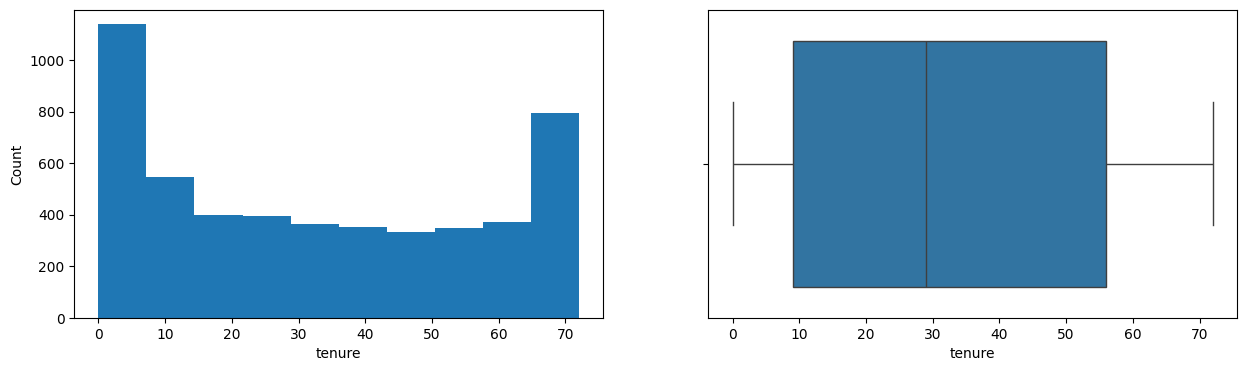

MonthlyCharges
Skew : -0.24


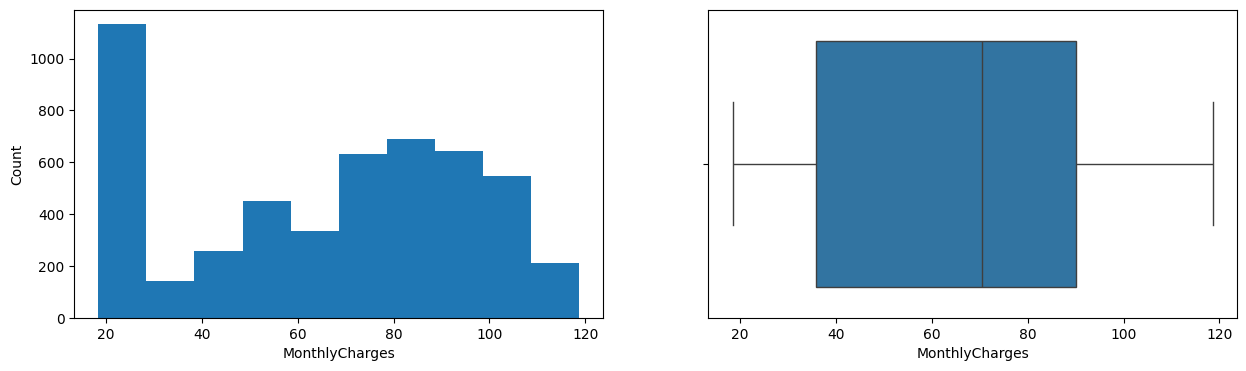

TotalCharges
Skew : 0.95


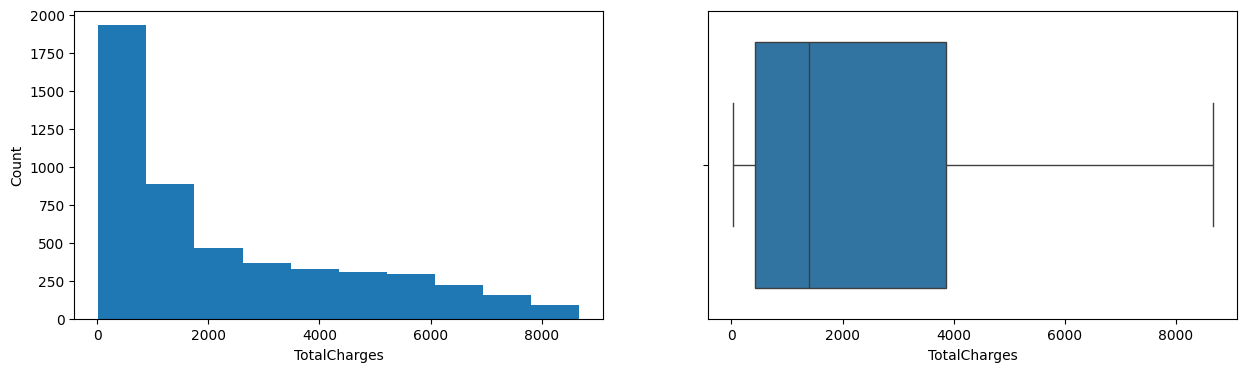

In [4934]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('Count')
    plt.xlabel(col)  # Set x-axis label for histogram
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.xlabel(col)  # Set x-axis label for box plot
    plt.show()


 


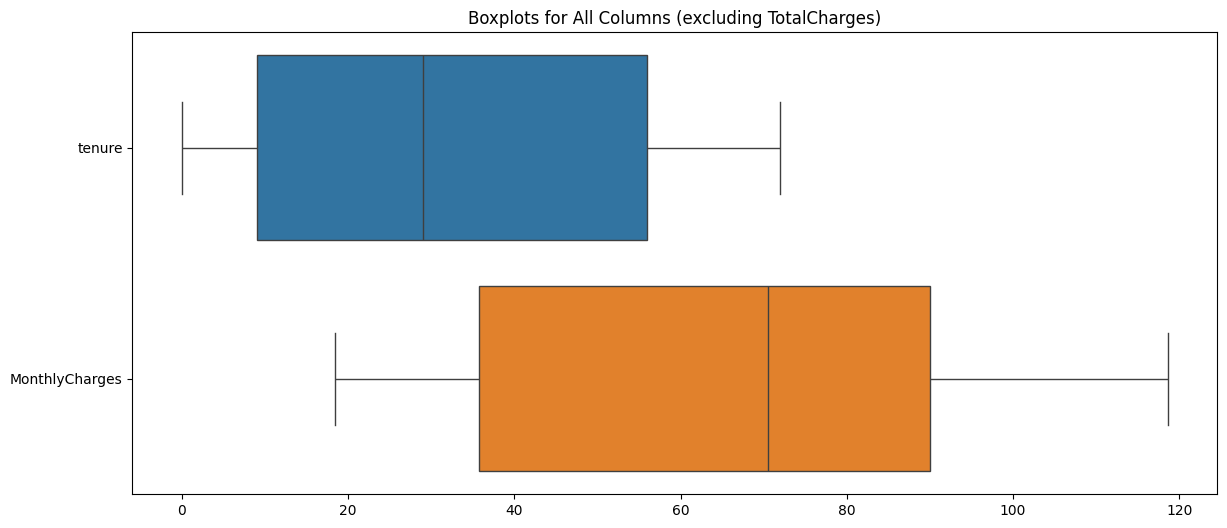

In [4935]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.drop(['TotalCharges'], axis=1), orient='h')
plt.title('Boxplots for All Columns (excluding TotalCharges)')
plt.show()

- Categorical variables are being visualized using Pie Charts and Histogram

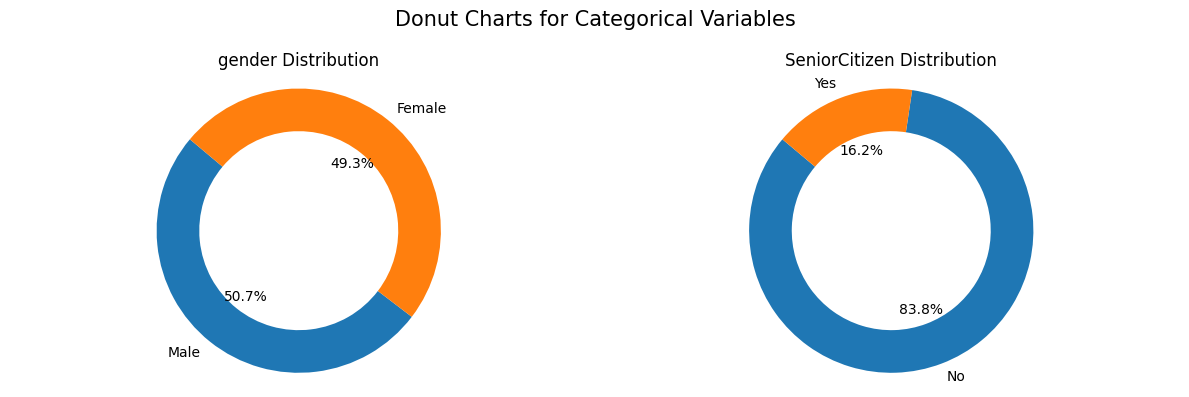

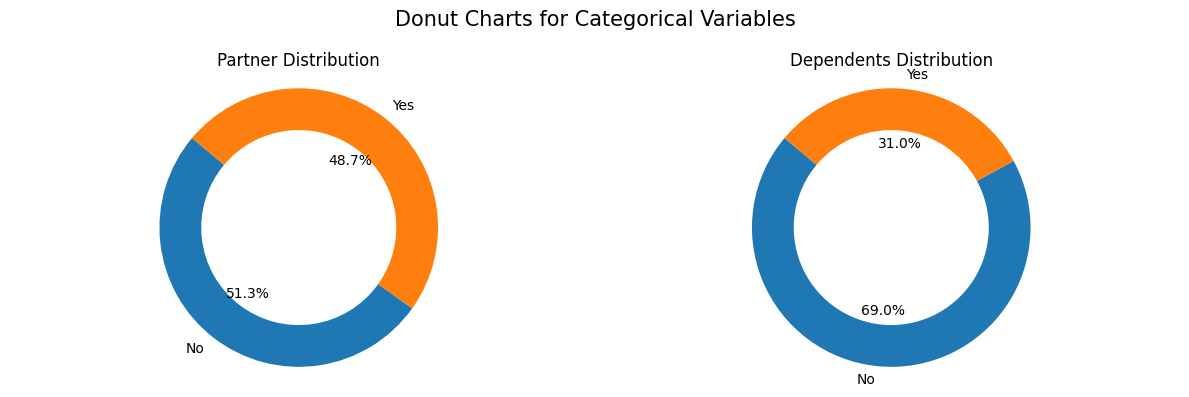

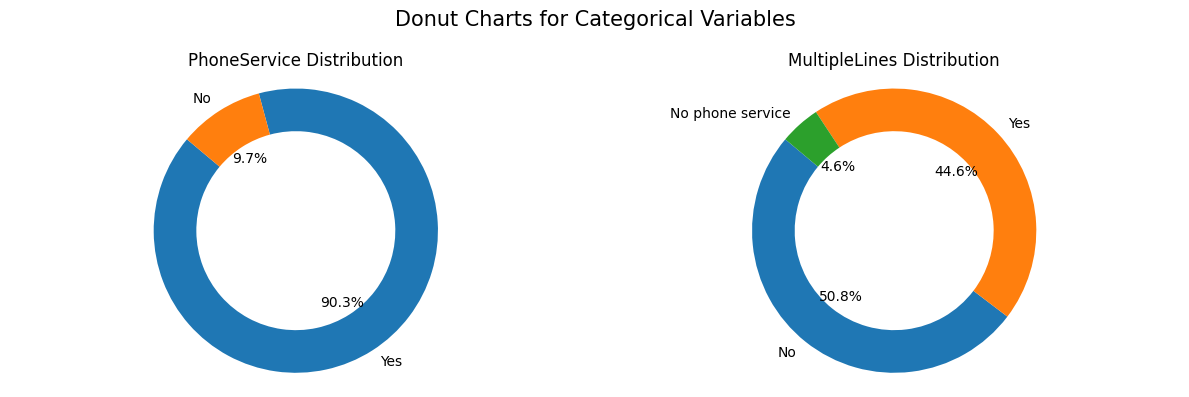

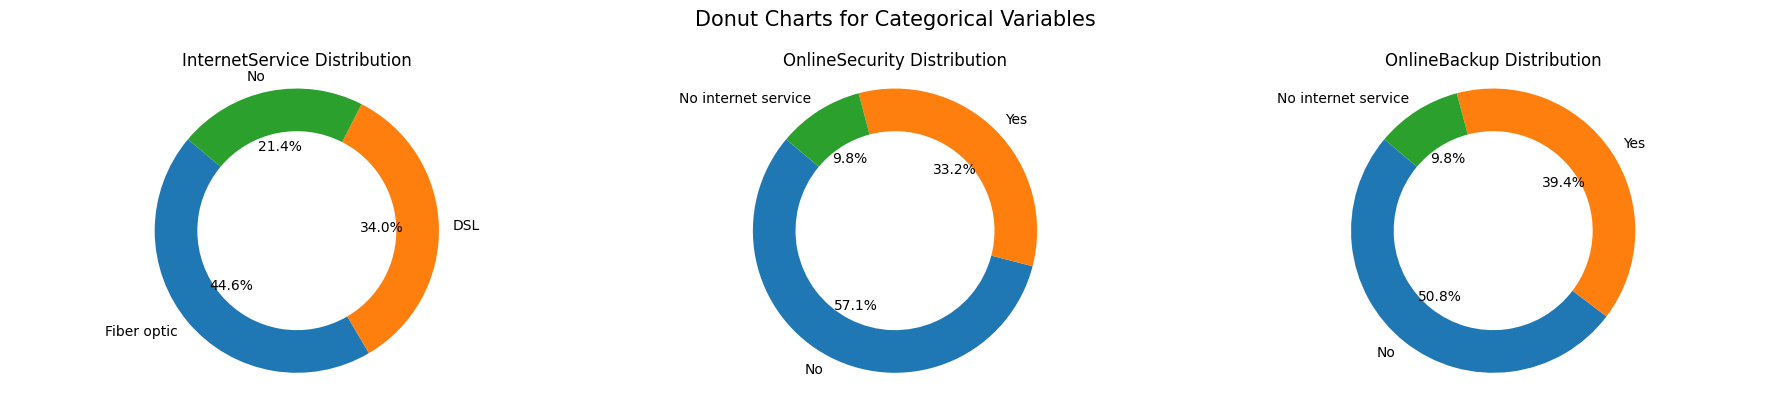

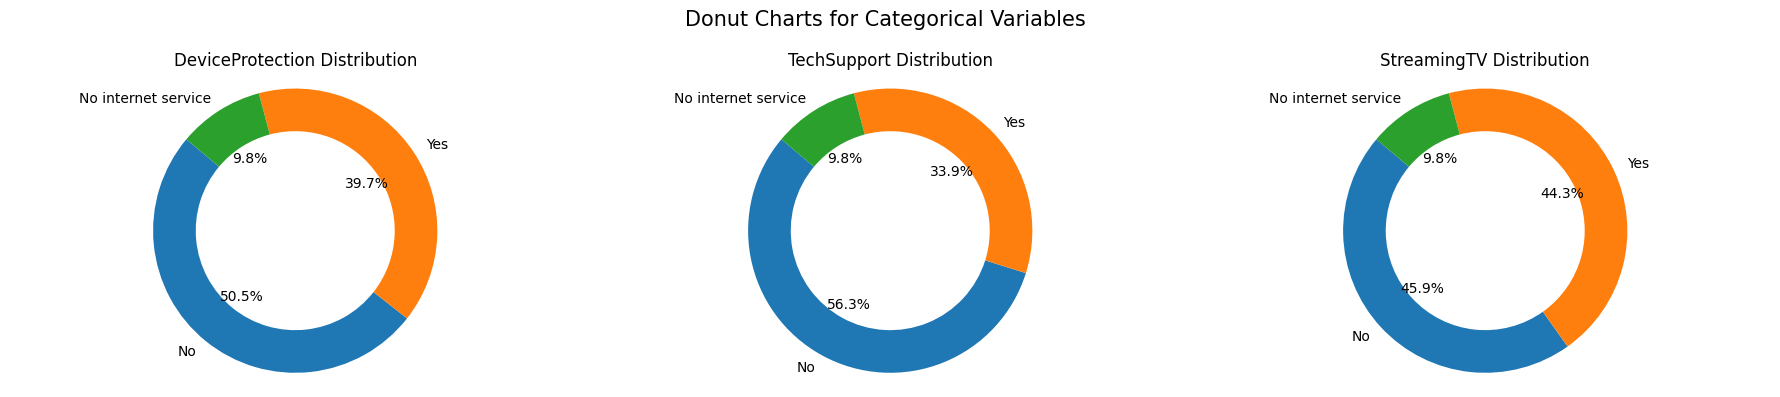

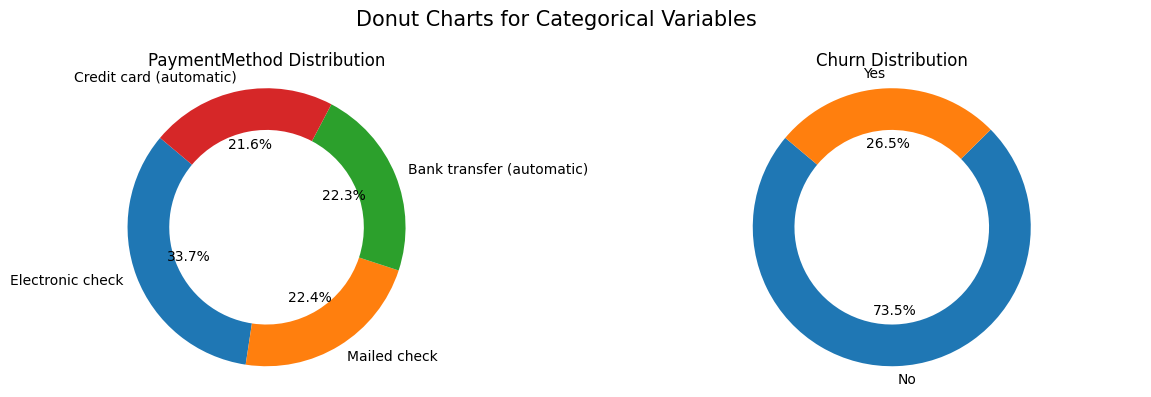

In [4936]:
# Define the pairs or threes of categorical columns
cat_cols_pairs = [
    ('gender', 'SeniorCitizen'), 
    ('Partner', 'Dependents'), 
    ('PhoneService', 'MultipleLines'),
    ('InternetService', 'OnlineSecurity', 'OnlineBackup'),
    ('DeviceProtection', 'TechSupport', 'StreamingTV'),
    ('PaymentMethod', 'Churn')
]

# Plotting donut charts for pairs or threes of categorical variables
for cols in cat_cols_pairs:
    fig, axs = plt.subplots(1, len(cols), figsize=(6 * len(cols), 4))
    fig.suptitle('Donut Charts for Categorical Variables', fontsize=15)
    
    for i, col in enumerate(cols):
        data = df[col].value_counts()
        axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
        axs[i].set_title(f'{col} Distribution')
        axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.tight_layout()
    plt.show()

- Bi-variate Analysis 

<Figure size 1300x1700 with 0 Axes>

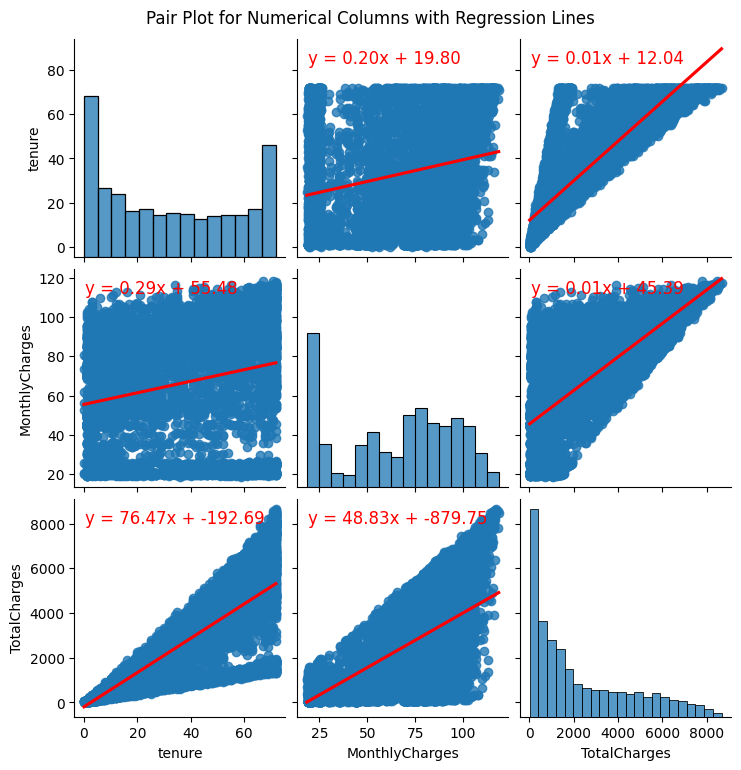

In [4937]:
# List of numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Pair plot to visualize all pairwise relationships with regression lines
plt.figure(figsize=(13, 17))
pair_plot = sns.pairplot(df[num_cols], kind='reg', plot_kws={'ci': None, 'line_kws': {'color': 'red'}})

# Add equations to each plot
for i, ax in enumerate(pair_plot.axes.flatten()):
    if ax is None:
        continue
    
    x_var = ax.get_xlabel()
    y_var = ax.get_ylabel()
    
    if x_var == '' or y_var == '':
        continue

    # Fit a linear regression model
    X = df[x_var].values.reshape(-1, 1)
    Y = df[y_var].values
    reg = LinearRegression().fit(X, Y)
    intercept = reg.intercept_
    slope = reg.coef_[0]

    # Calculate the equation of the regression line
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=12, verticalalignment='top', color='red')

plt.suptitle('Pair Plot for Numerical Columns with Regression Lines', y=1.02)
plt.show()



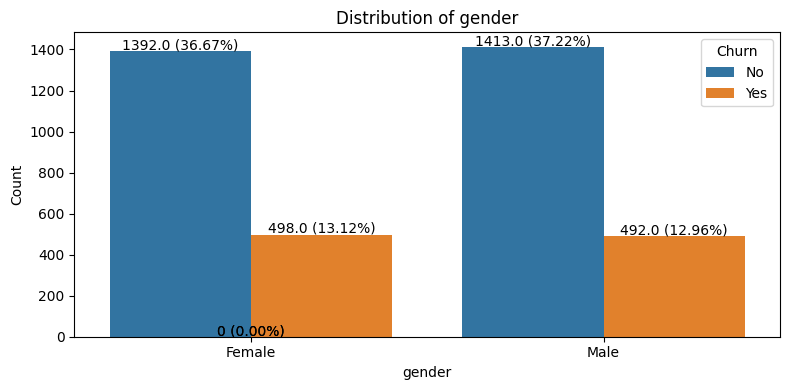

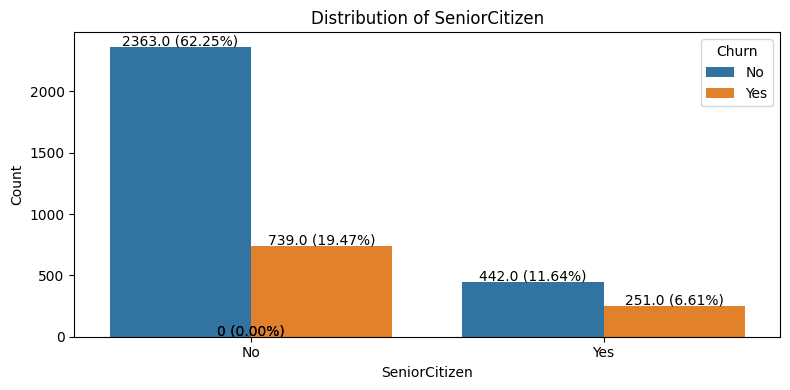

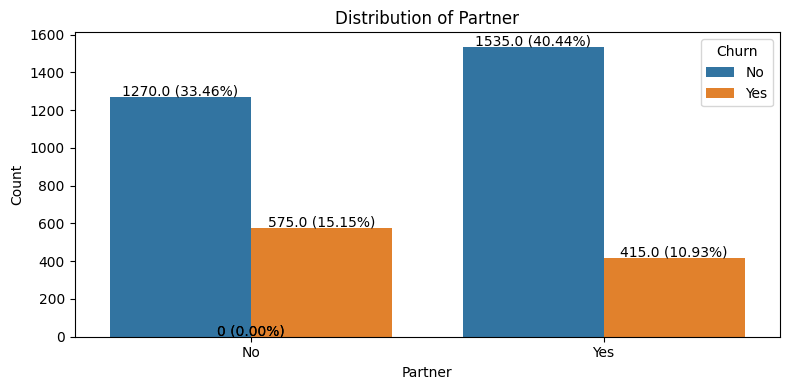

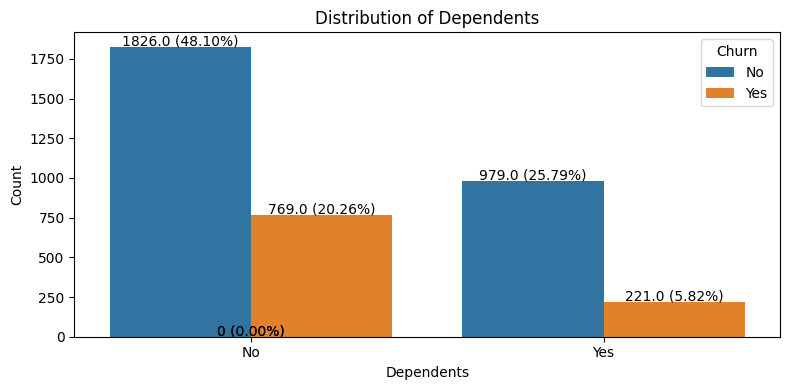

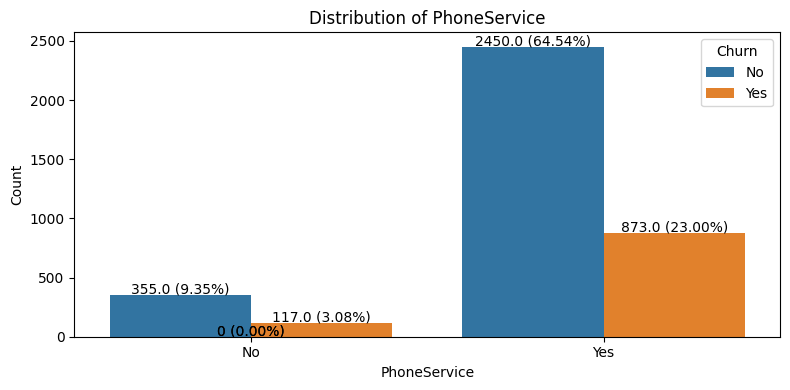

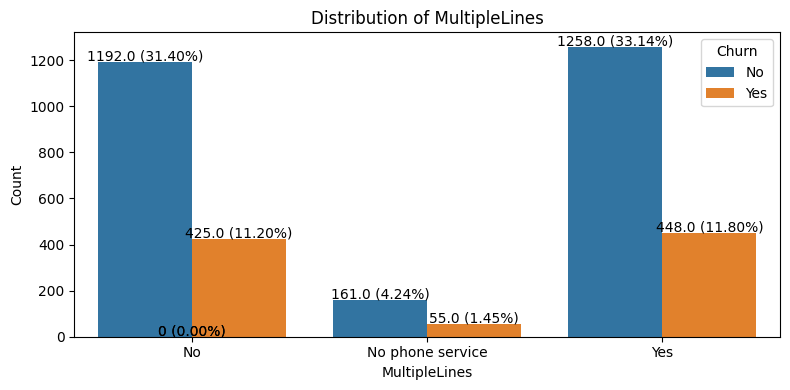

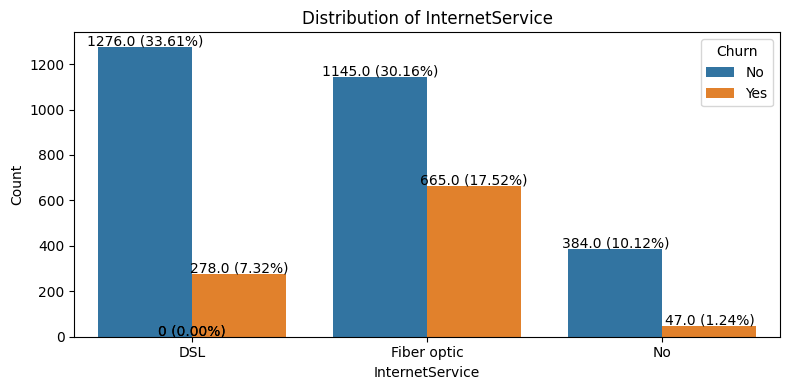

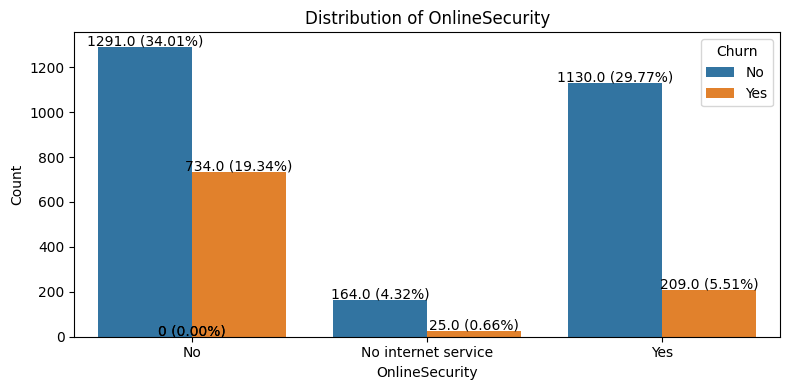

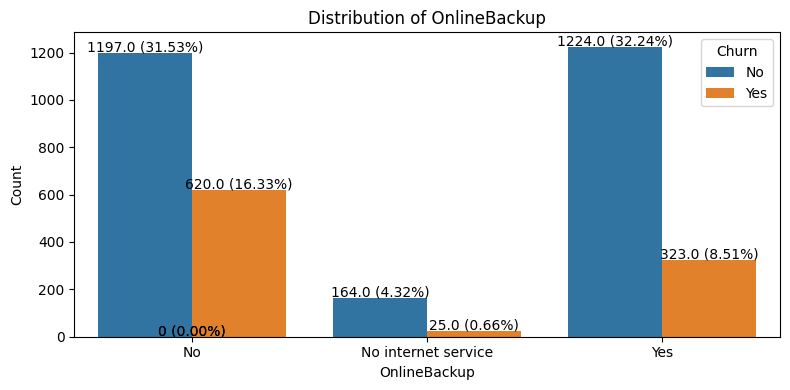

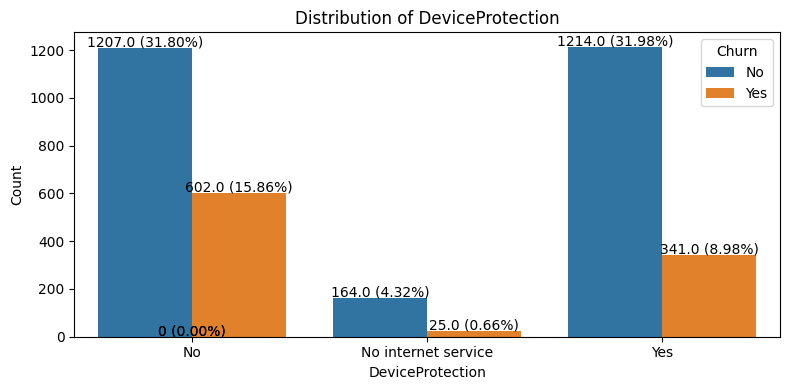

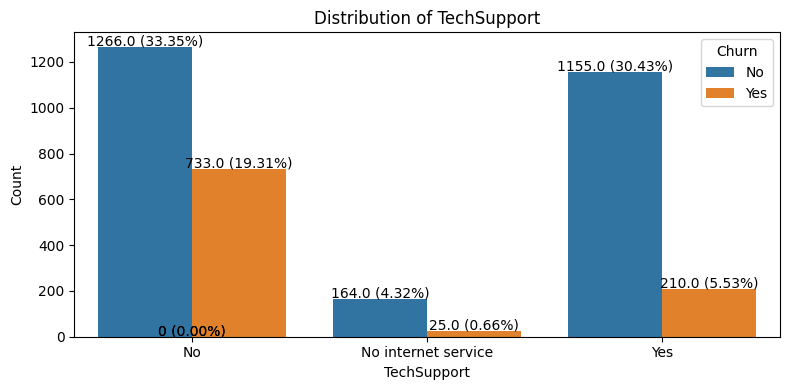

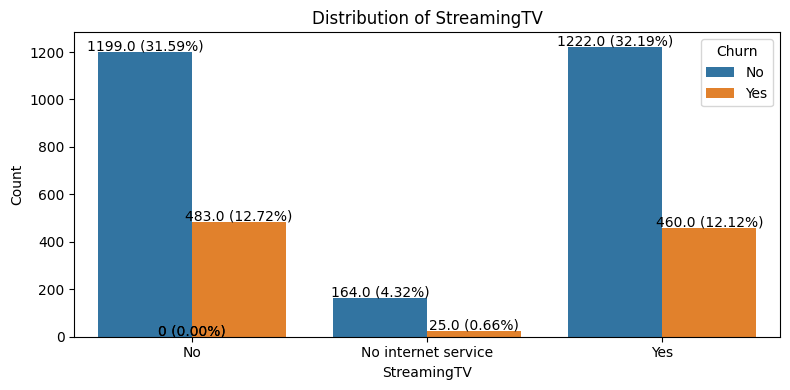

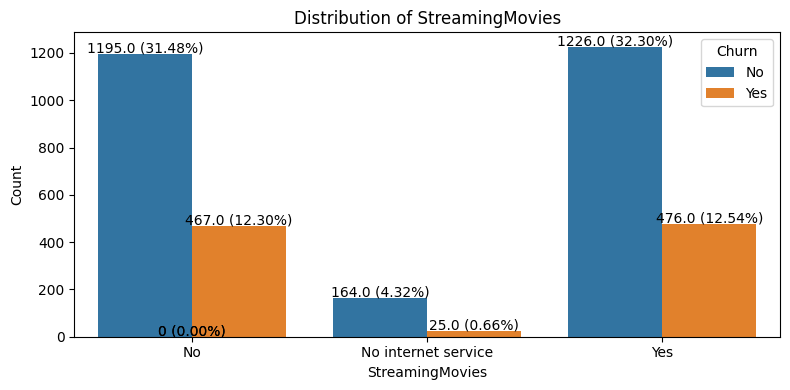

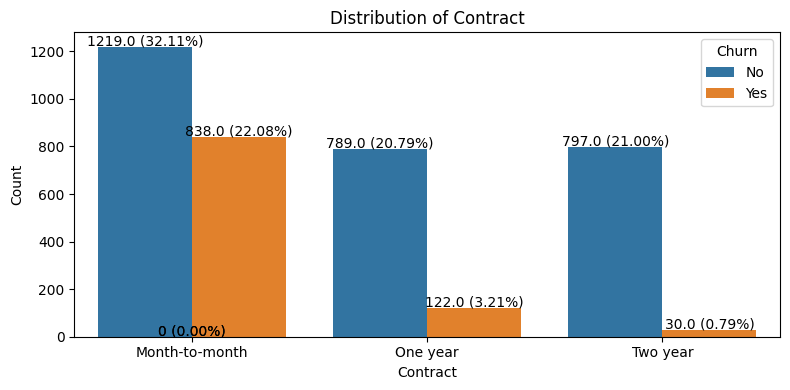

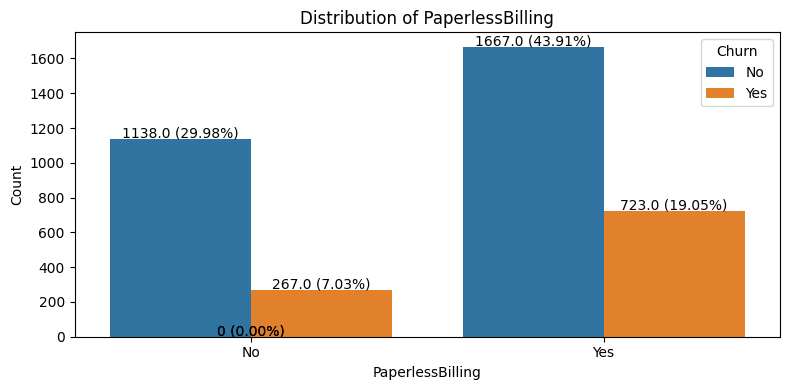

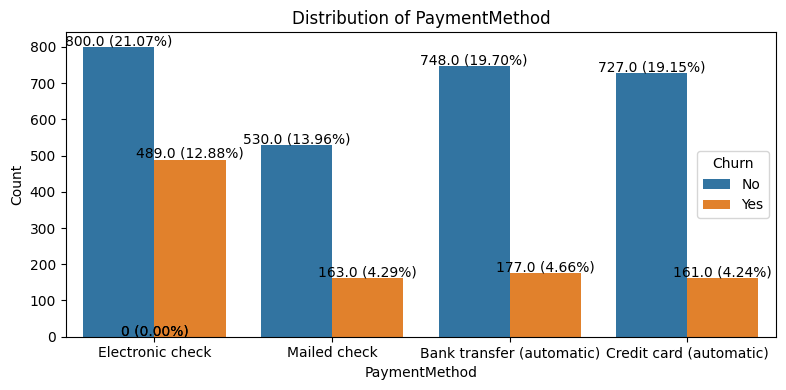

In [4938]:
df = df.drop_duplicates(subset=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                                'MultipleLines', 'InternetService', 'OnlineSecurity',
                                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                                'PaymentMethod', 'Churn'])

# Reset index after dropping duplicates
df = df.reset_index(drop=True)

# List of categorical columns
cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Function to add labels with numbers and percentages to the plots
def add_labels(ax, total_count):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height()/total_count*100:.2f}%)', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 4), textcoords='offset points')

# Plotting univariate distributions for categorical variables with 'Churn' as hue
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Add labels with numbers and percentages
    add_labels(ax, df.shape[0])
    
    plt.tight_layout()
    plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_18520\3151422244.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


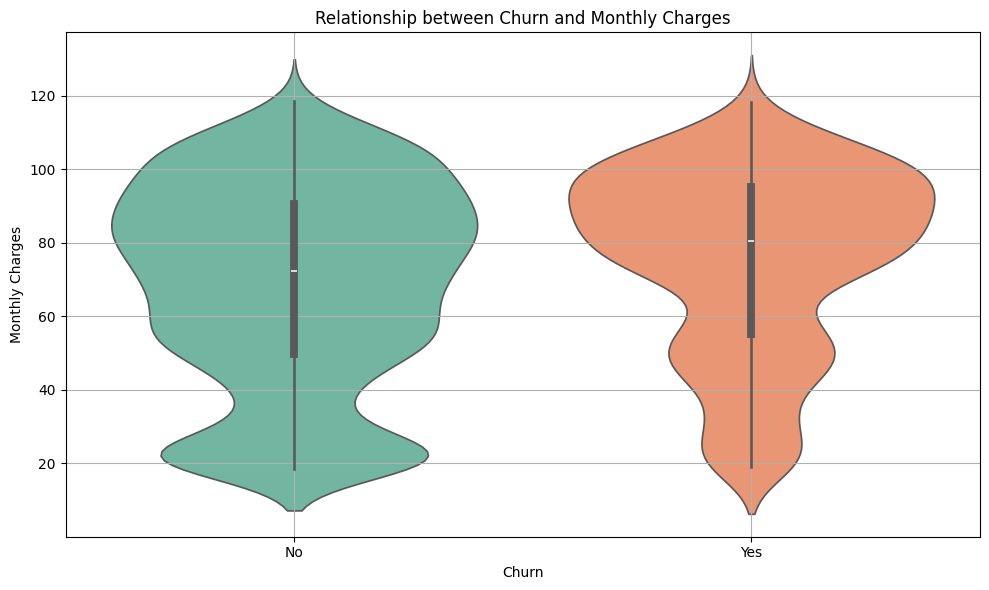

C:\Users\pc\AppData\Local\Temp\ipykernel_18520\3151422244.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='TotalCharges', data=df, palette='Set2')


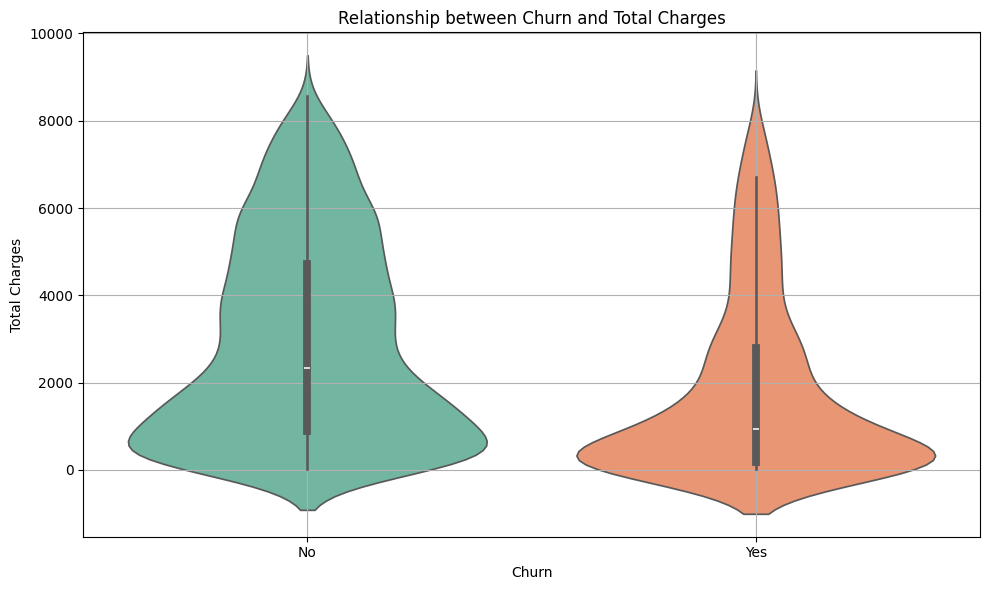

In [4939]:
# Convert Churn column to categorical type for correct ordering in the plot
df['Churn'] = df['Churn'].astype('category')

# Plotting the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Relationship between Churn and Monthly Charges')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='TotalCharges', data=df, palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Relationship between Churn and Total Charges')
plt.grid(True)
plt.tight_layout()
plt.show()

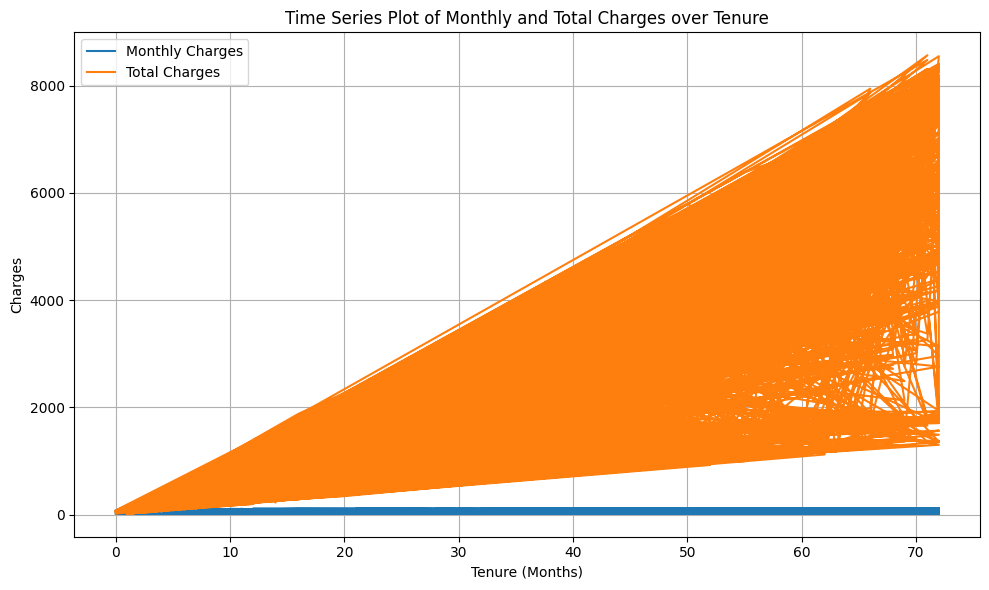

In [4940]:
# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df['tenure'], df['MonthlyCharges'], label='Monthly Charges')
plt.plot(df['tenure'], df['TotalCharges'], label='Total Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Charges')
plt.title('Time Series Plot of Monthly and Total Charges over Tenure')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_18520\2029529394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contract', y='tenure', data=df, palette='Set2')


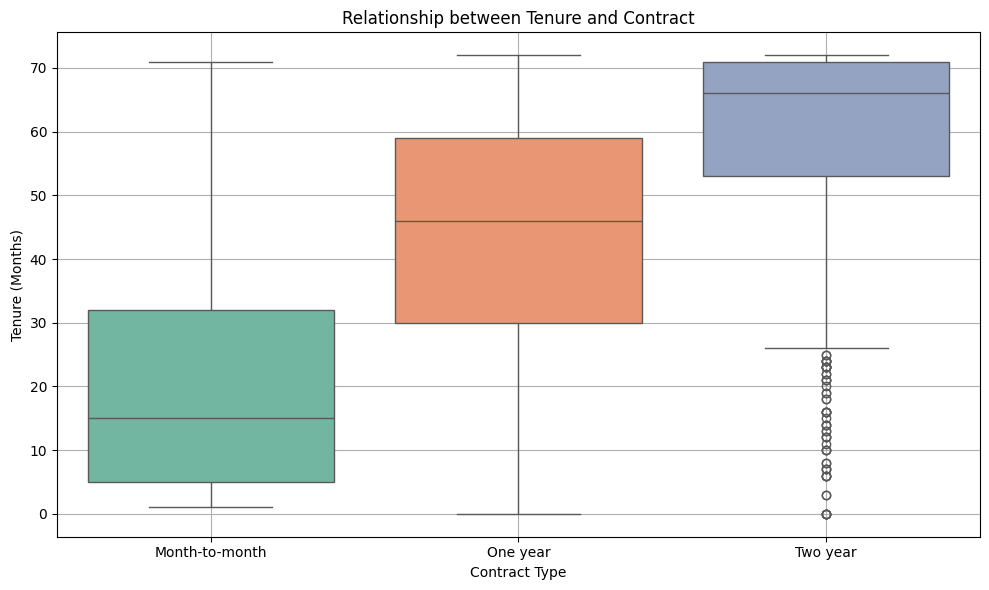

In [4941]:

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='tenure', data=df, palette='Set2')
plt.xlabel('Contract Type')
plt.ylabel('Tenure (Months)')
plt.title('Relationship between Tenure and Contract')
plt.grid(True)
plt.tight_layout()
plt.show()


- Multi-variate Analysis   

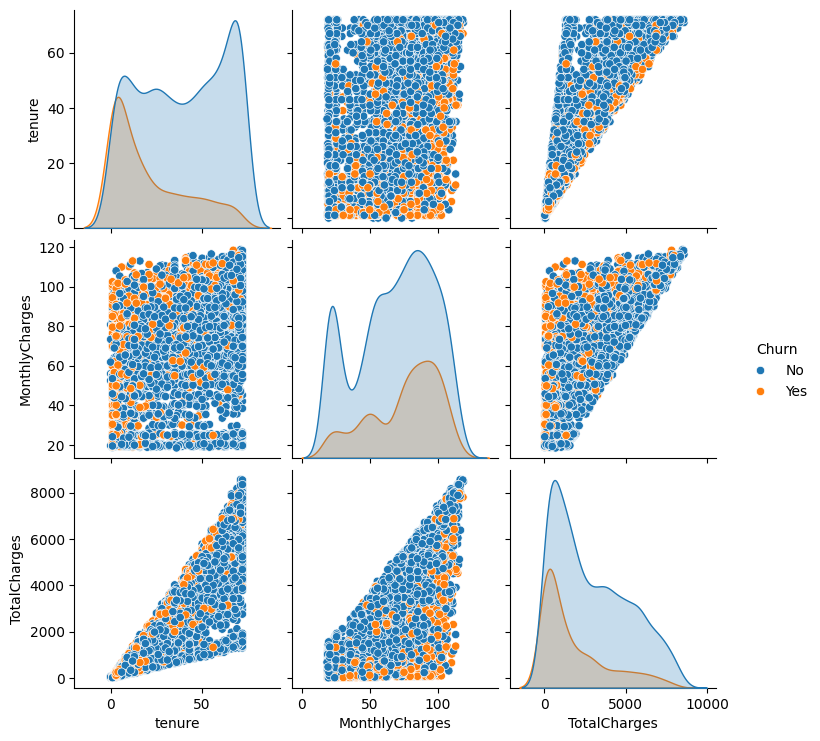

In [4942]:
# Select numeric columns only
numeric_cols = [ 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
data = df[numeric_cols]
sns.pairplot(data, hue = 'Churn')
plt.show()




- Answer Analytical questions with visulizations

- 1. What are the primary factors influencing customer churn?

By analyzing the relationships between various features (e.g., tenure, InternetService, Contract, MonthlyCharges, TotalCharges) and the Churn variable, you can identify the key drivers of customer churn. This information can help in developing targeted retention strategies.

Duplicate indices: Index([], dtype='int64')


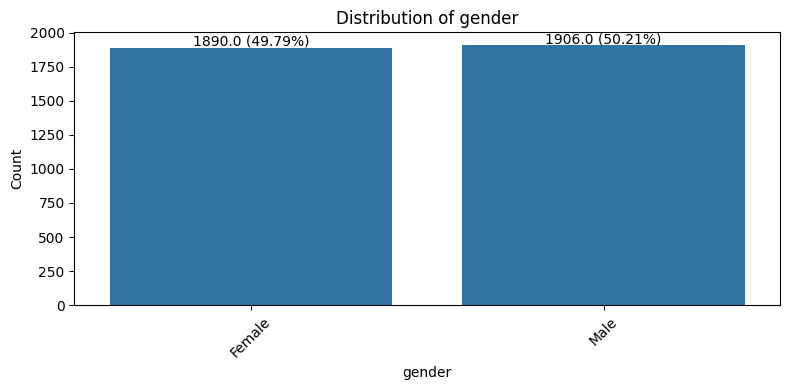

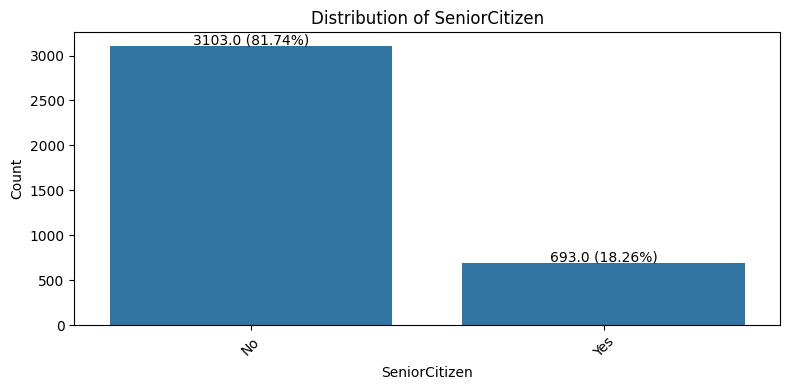

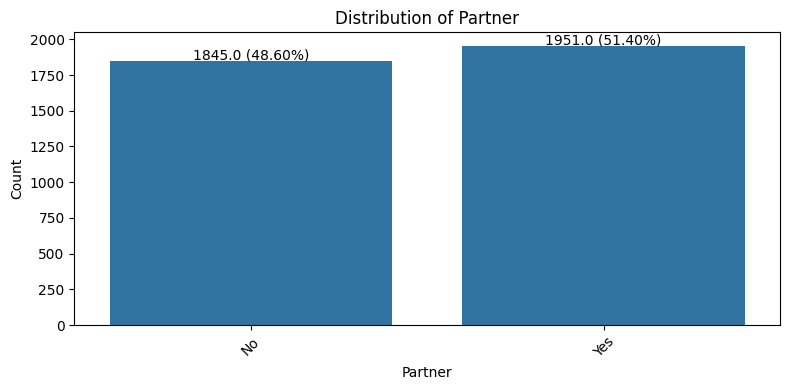

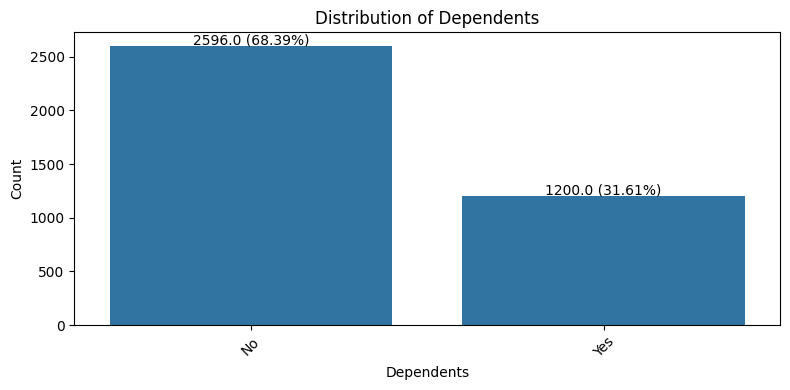

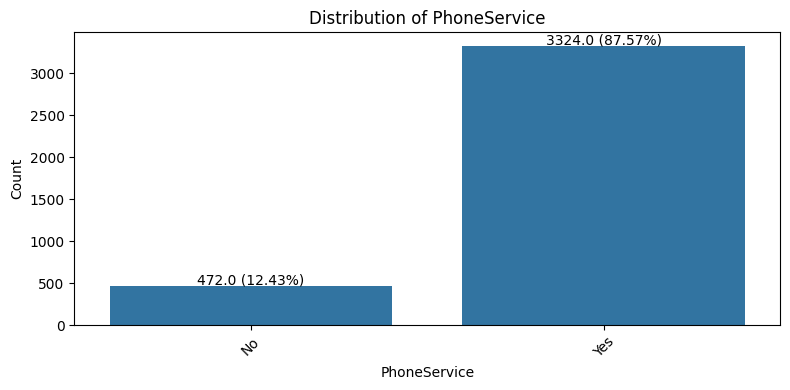

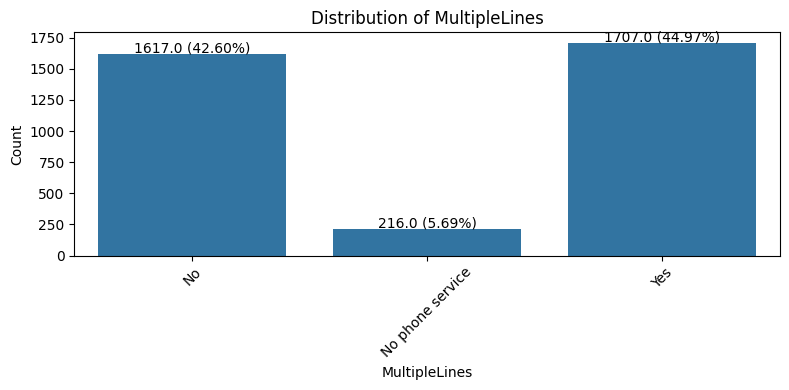

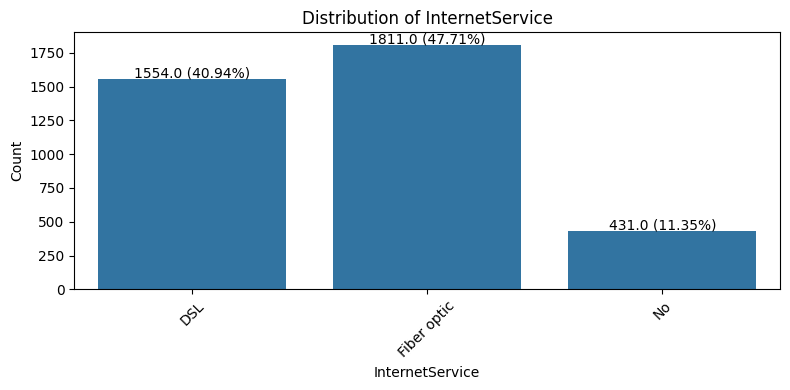

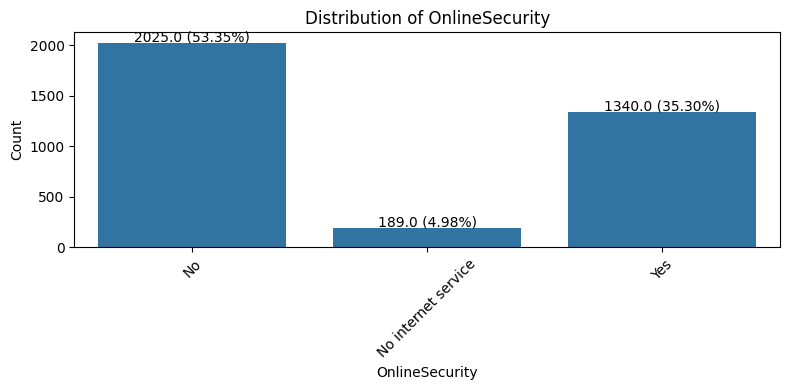

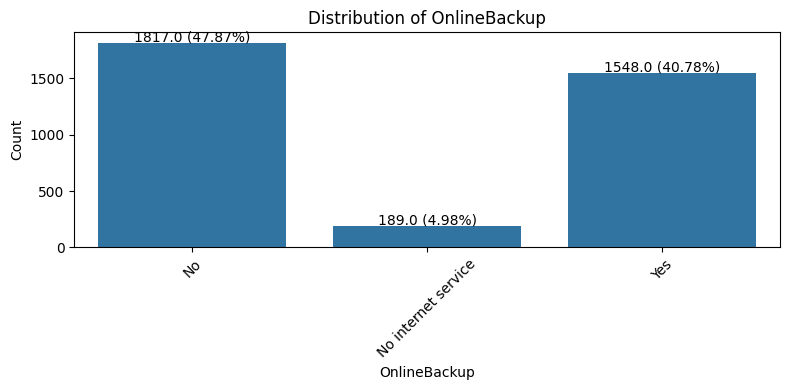

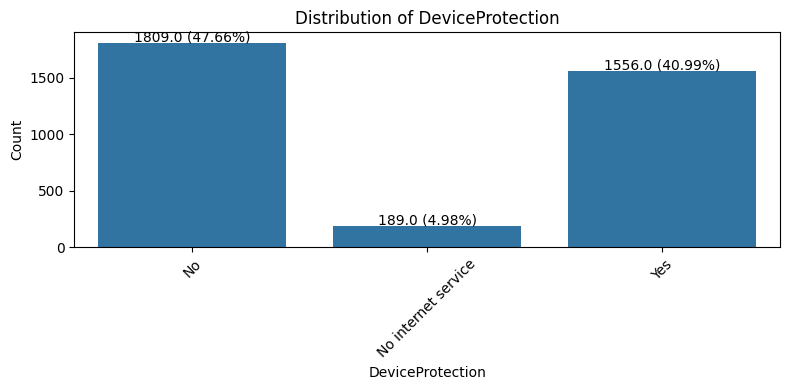

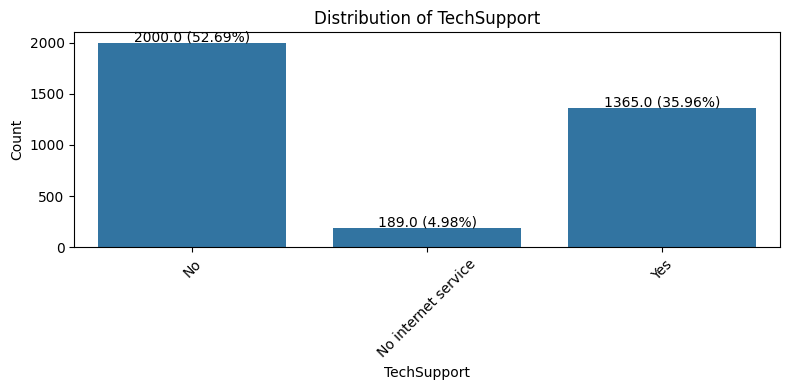

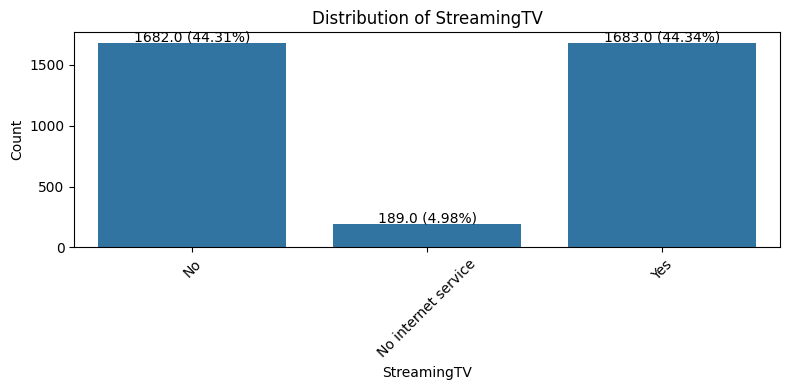

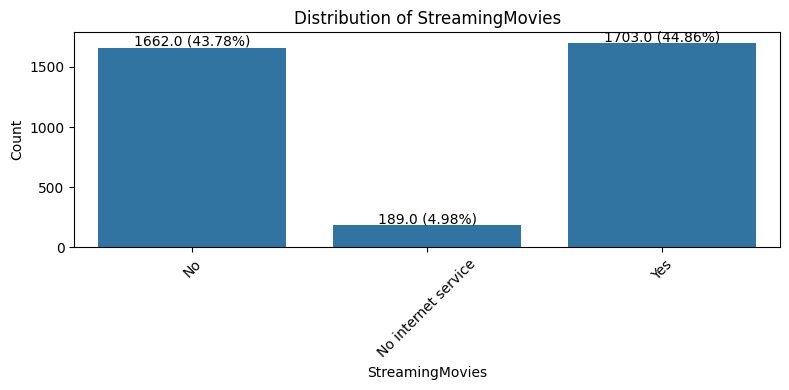

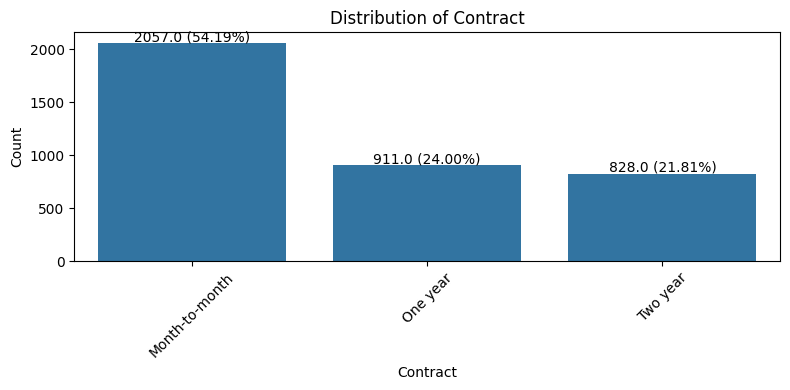

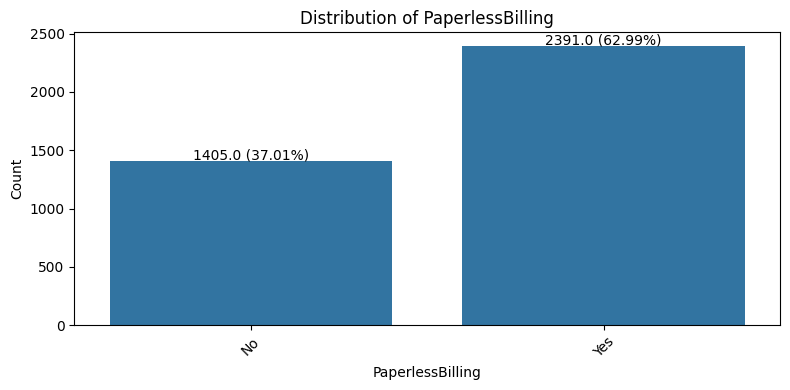

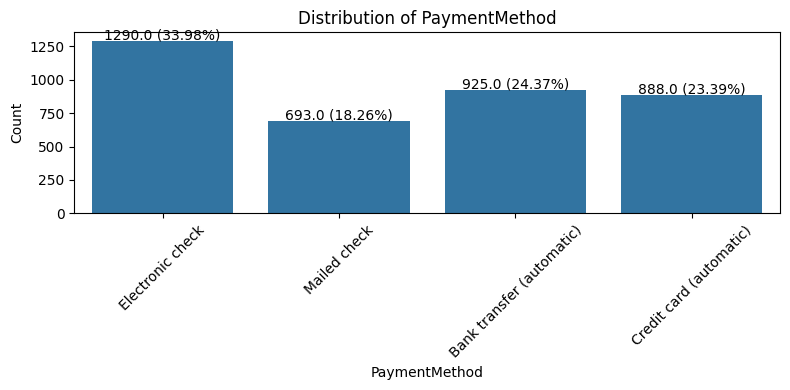

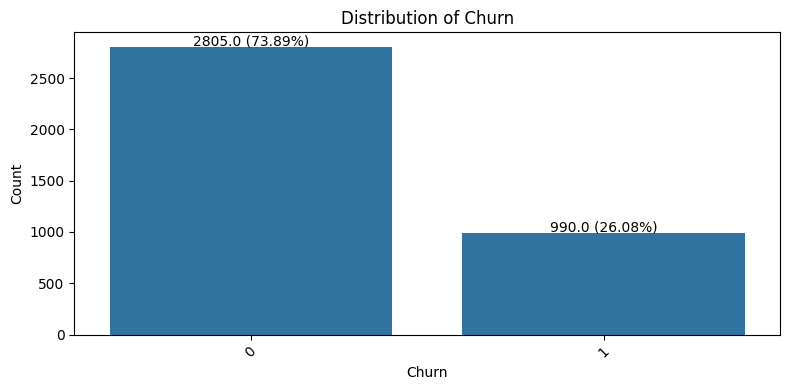

In [4943]:
# Convert 'Churn' to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Check for duplicate indices
duplicate_indices = df.index[df.index.duplicated()]
print("Duplicate indices:", duplicate_indices)

# Reset index to remove duplicate indices
df = df.reset_index(drop=True)

# List of categorical columns
cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Function to add labels with numbers and percentages to the plots
def add_labels(ax, total_count):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height()/total_count*100:.2f}%)', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 4), textcoords='offset points')

# Plotting univariate distributions for categorical variables
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Add labels with numbers and percentages
    add_labels(ax, df.shape[0])
    
    plt.tight_layout()
    plt.show()




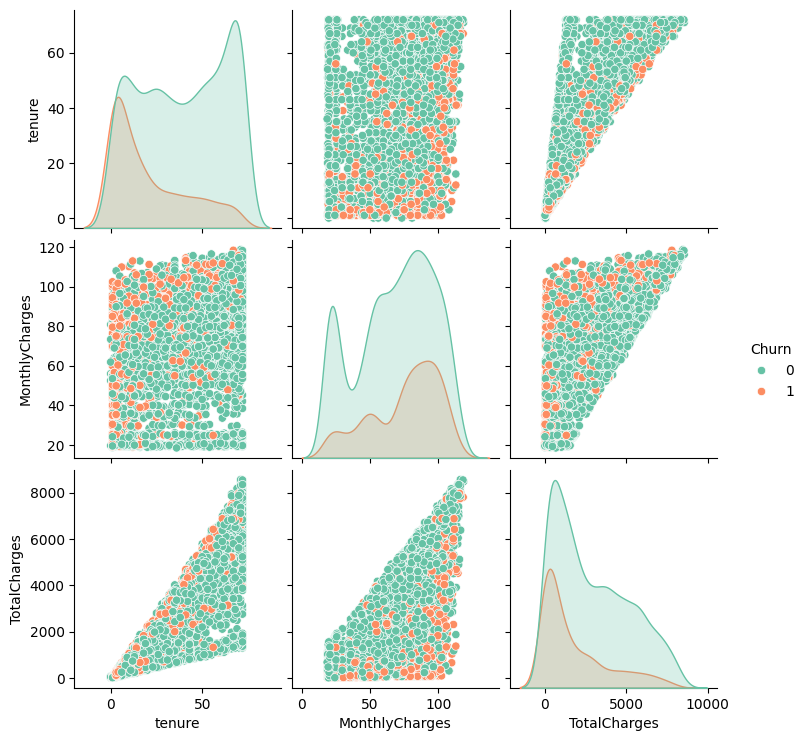

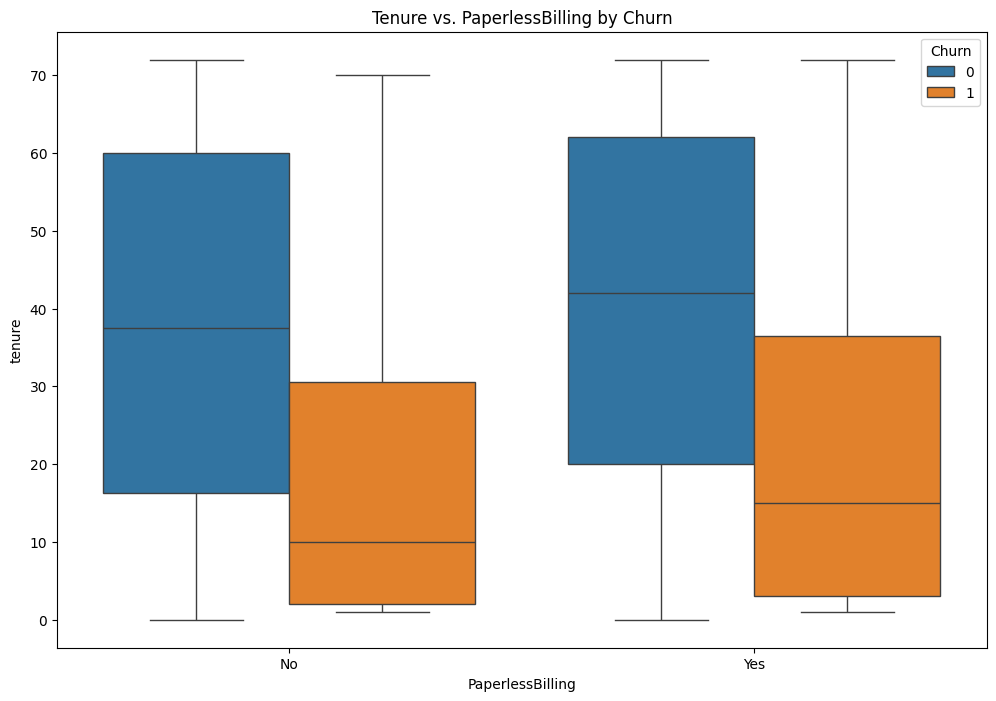

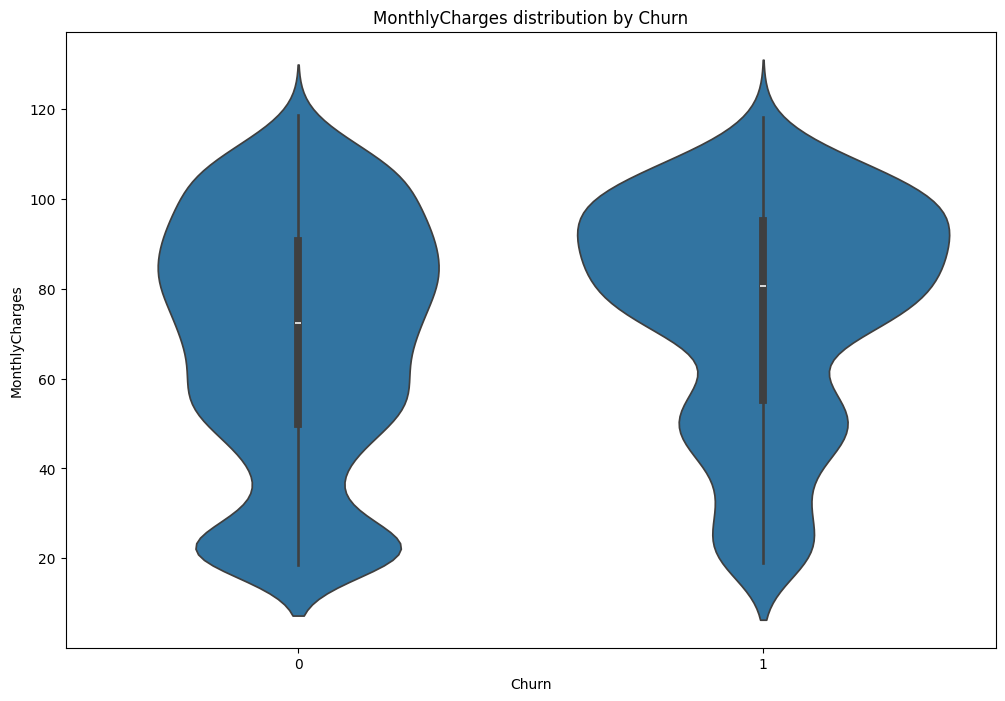

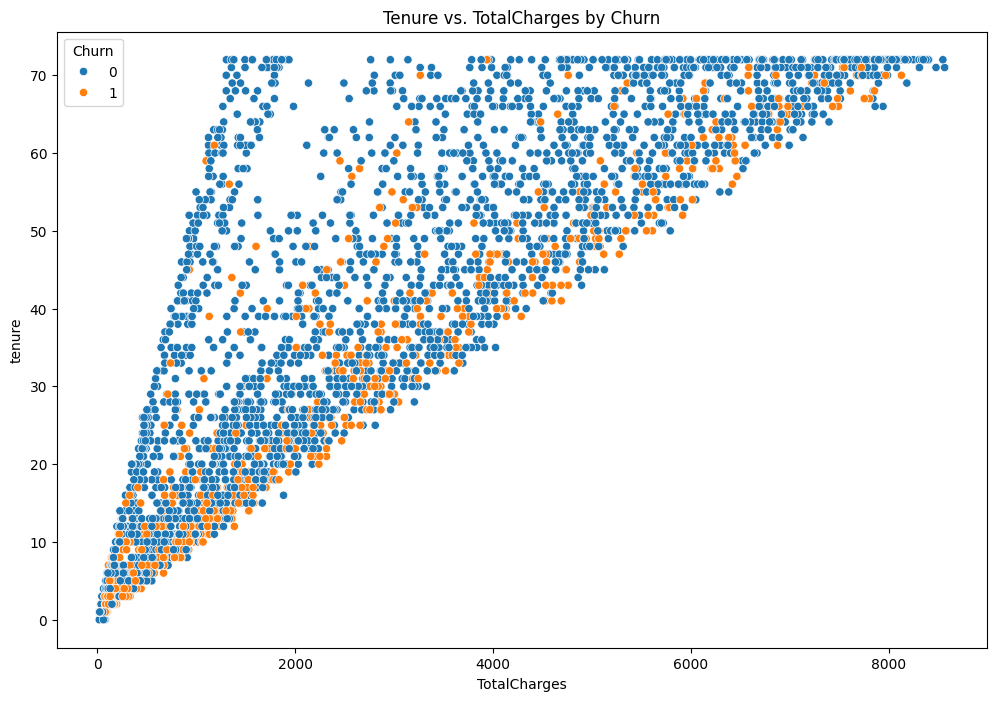

In [4944]:

# Select relevant columns for analysis
columns_of_interest = ['tenure', 'PaperlessBilling', 'Dependents', 'OnlineSecurity', 
                       'TechSupport', 'Contract', 'MonthlyCharges', 'TotalCharges', 'Churn']
df_subset = df[columns_of_interest]

# Visualize relationships using pairplot
sns.pairplot(df_subset, hue='Churn', palette='Set2')
plt.show()

# Boxplot for categorical variables
plt.figure(figsize=(12, 8))
sns.boxplot(x='PaperlessBilling', y='tenure', hue='Churn', data=df)
plt.title('Tenure vs. PaperlessBilling by Churn')
plt.show()

# Violin plot for numerical variables
plt.figure(figsize=(12, 8))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges distribution by Churn')
plt.show()

# Scatter plot for numerical variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TotalCharges', y='tenure', hue='Churn', data=df)
plt.title('Tenure vs. TotalCharges by Churn')
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_18520\2809205319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)  # Example, you may have a different strategy for handling missing data


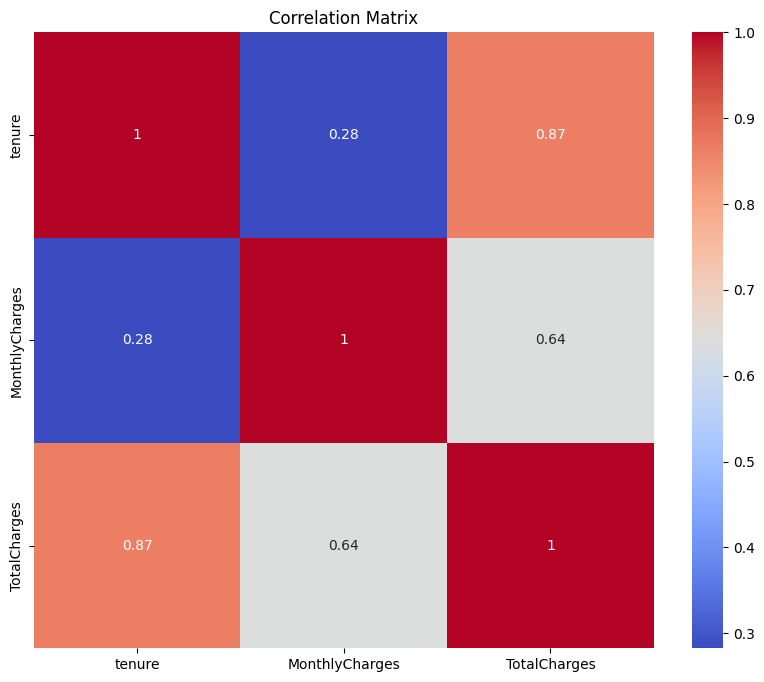

In [4945]:

# Drop non-numeric columns or columns with non-numeric values
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Handle missing values if any
df_numeric.dropna(inplace=True)  # Example, you may have a different strategy for handling missing data

# Calculate correlation matrix for numeric columns
corr_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


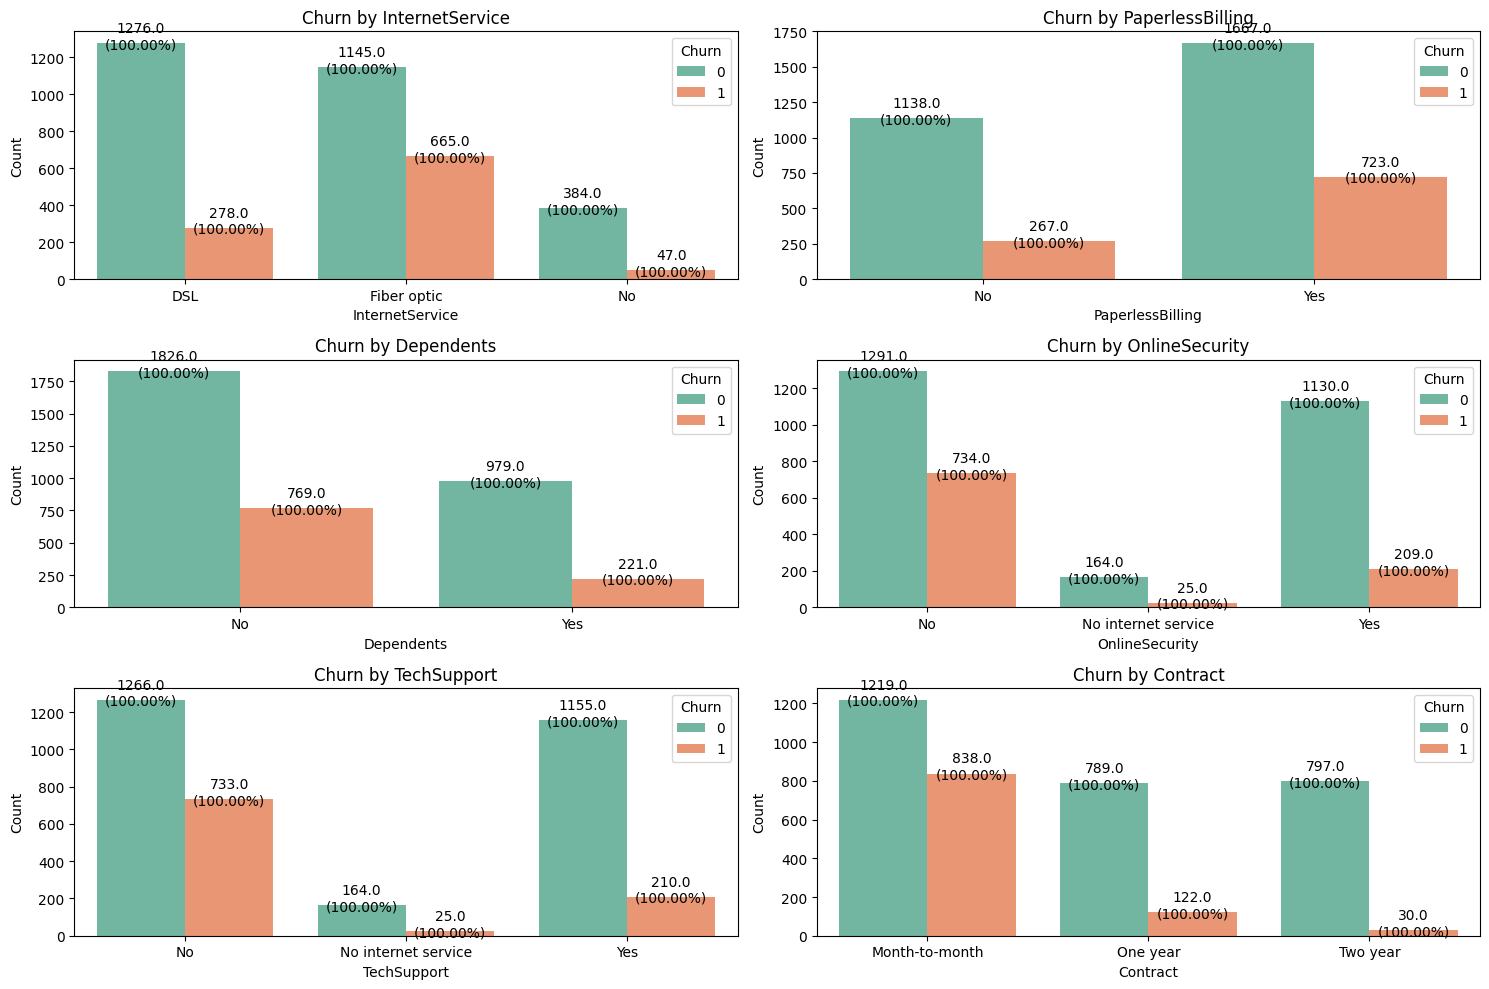

In [4946]:
# Assuming the correct column names are ['InternetService', 'PaperlessBilling', 'Dependents', 'OnlineSecurity', 
#                                       'TechSupport', 'Contract', 'Churn']
columns_of_interest = ['InternetService', 'PaperlessBilling', 'Dependents', 'OnlineSecurity', 
                       'TechSupport', 'Contract', 'Churn']

# Select relevant columns for analysis
df_subset = df[columns_of_interest]

# Plot stacked bar plots for each category
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

categories = ['InternetService', 'PaperlessBilling', 'Dependents', 'OnlineSecurity', 'TechSupport', 'Contract']

for i, cat in enumerate(categories):
    row = i // 2
    col = i % 2
    ax = sns.countplot(x=cat, hue='Churn', data=df, ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(f'Churn by {cat}')
    axes[row, col].set_xlabel(cat)
    axes[row, col].set_ylabel('Count')
    
    # Add count labels and percentages
    for p in ax.patches:
        height = p.get_height()
        total = sum([patch.get_height() for patch in ax.patches if patch.get_x() == p.get_x()])
        if total > 0:  # Ensure total is not zero to avoid division by zero error
            percentage = f'{height/total:.2%}'
            ax.annotate(f'{height}\n({percentage})', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', xytext=(0, 5), 
                        textcoords='offset points')

plt.tight_layout()
plt.show()

- 2. How does the type of contract affect customer churn rates?

C:\Users\pc\AppData\Local\Temp\ipykernel_18520\1250481907.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_label = f'{height/total_counts[int(x + width / 2)]:.2%}'


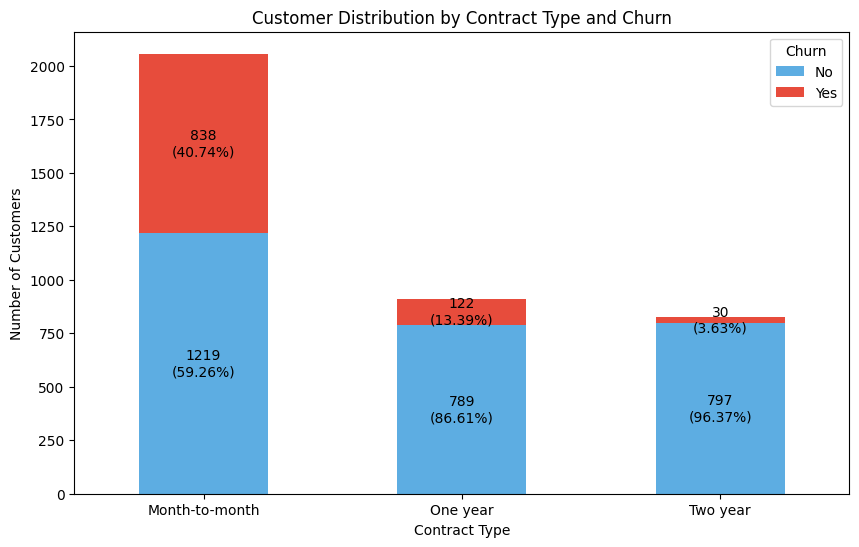

In [4947]:
# Create a crosstab to count the occurrences of churn and contract type
contract_churn = pd.crosstab(df['Contract'], df['Churn'])

# Calculate the total count for each contract type
total_counts = contract_churn.sum(axis=1)

# Calculate the percentage of churned customers for each contract type
churn_percentage = contract_churn.div(total_counts, axis=0) * 100

# Plot the stacked bar plot
ax = contract_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#5DADE2', '#E74C3C'])

# Add labels with counts and percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        count_label = f'{int(height)}'
        percentage_label = f'{height/total_counts[int(x + width / 2)]:.2%}'
        ax.annotate(f'{count_label}\n({percentage_label})', (x + width / 2, y + height / 2), 
                    ha='center', va='center', fontsize=10, color='black')

plt.title('Customer Distribution by Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

- 3. What is the impact of payment method on customer retention?

C:\Users\pc\AppData\Local\Temp\ipykernel_18520\2242640464.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_label = f'{height/total_counts[int(x + width / 2)]:.2%}'


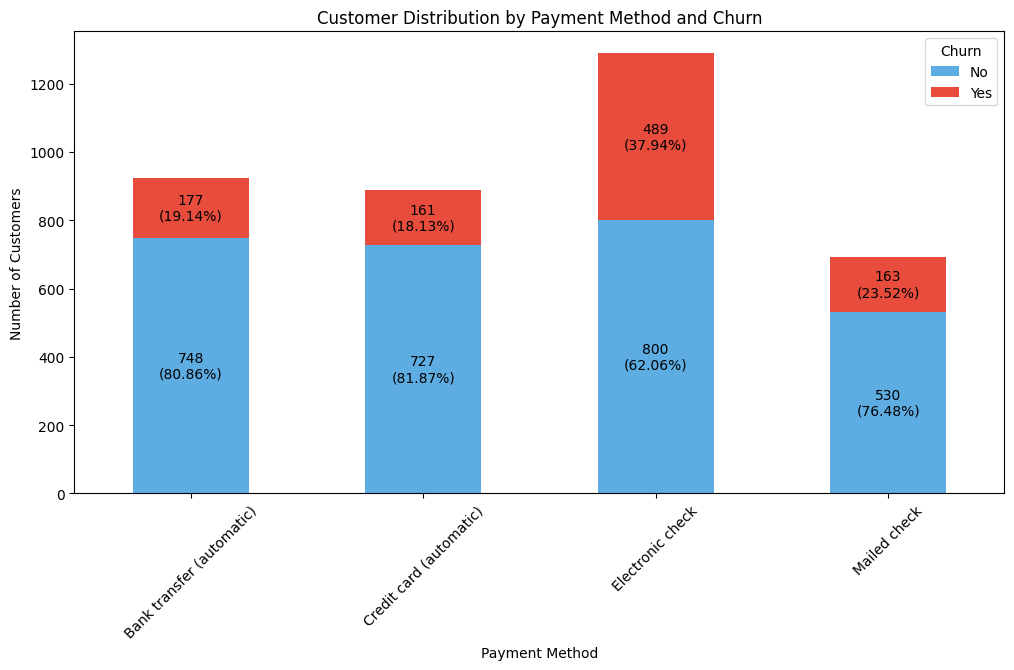

In [4948]:
# Create a crosstab to count the occurrences of churn and payment method
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'])

# Calculate the total count for each payment method
total_counts = payment_churn.sum(axis=1)

# Calculate the percentage of churned customers for each payment method
churn_percentage = payment_churn.div(total_counts, axis=0) * 100

# Plot the stacked bar plot
ax = payment_churn.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#5DADE2', '#E74C3C'])

# Add labels with counts and percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        count_label = f'{int(height)}'
        percentage_label = f'{height/total_counts[int(x + width / 2)]:.2%}'
        ax.annotate(f'{count_label}\n({percentage_label})', (x + width / 2, y + height / 2), 
                    ha='center', va='center', fontsize=10, color='black')

plt.title('Customer Distribution by Payment Method and Churn')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

- 4. How does the tenure of a customer correlate with their monthly charges and churn rate?

C:\Users\pc\AppData\Local\Temp\ipykernel_18520\2809205319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)  # Example, you may have a different strategy for handling missing data


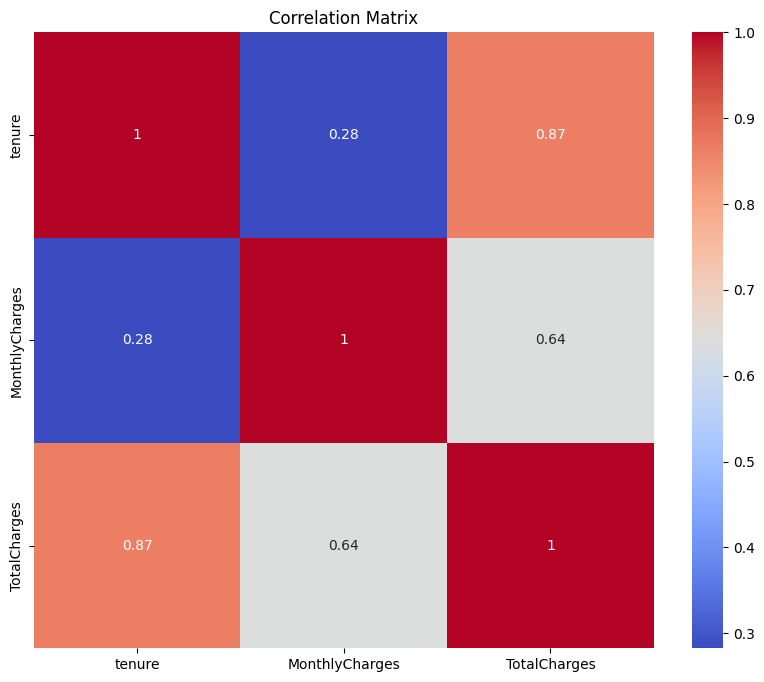

In [4949]:

# Drop non-numeric columns or columns with non-numeric values
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Handle missing values if any
df_numeric.dropna(inplace=True)  # Example, you may have a different strategy for handling missing data

# Calculate correlation matrix for numeric columns
corr_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


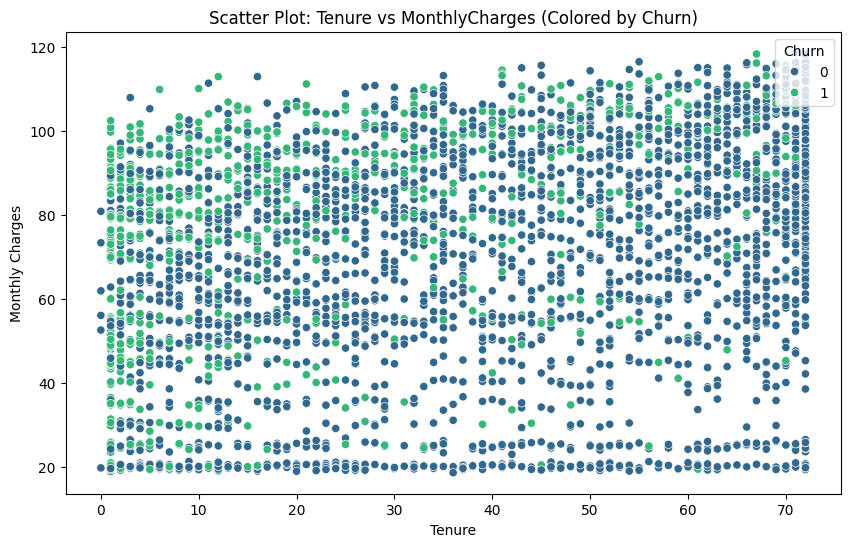

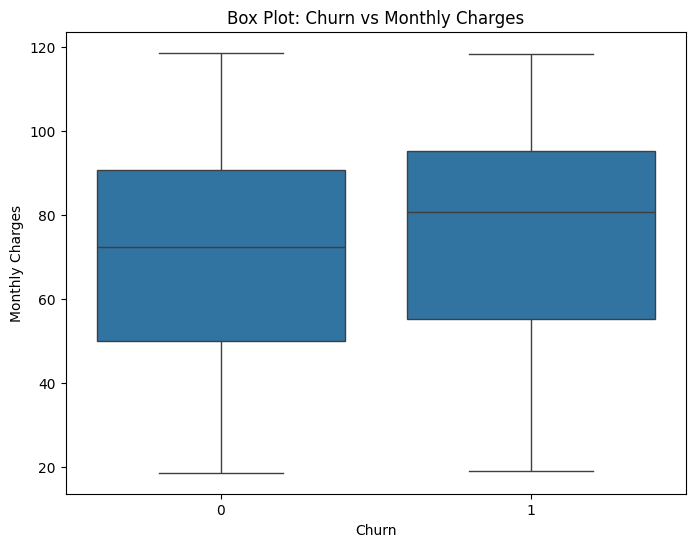

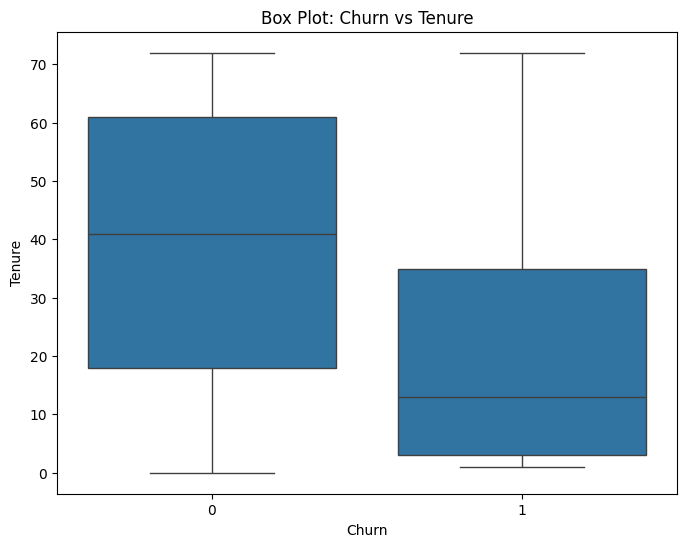

In [4950]:
# Scatter plot with hue (Churn)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, palette='viridis')
plt.title('Scatter Plot: Tenure vs MonthlyCharges (Colored by Churn)')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Box plot for Churn vs. MonthlyCharges
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Box Plot: Churn vs Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

# Box plot for Churn vs. Tenure
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Box Plot: Churn vs Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

- 5. Which internet service type is most preferred by customers, and how does it relate to churn?

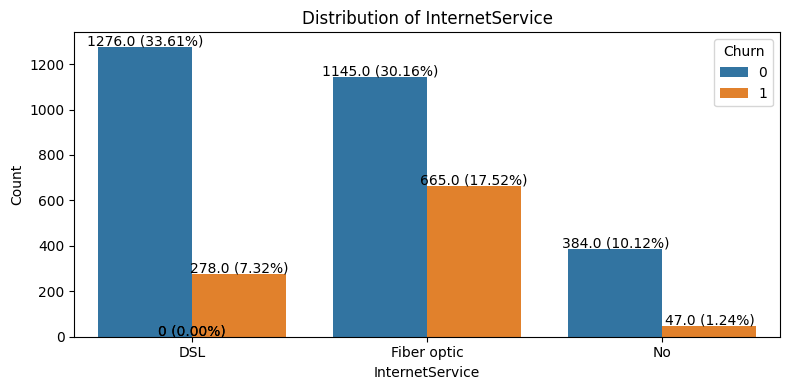

In [4951]:
# show the relationship between categorical columns and churn column

# List of categorical columns

cat_cols = [
    
    'InternetService', 
]

# Function to add labels with numbers and percentages to the plots

def add_labels(ax, total_count):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height()/total_count*100:.2f}%)', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 4), textcoords='offset points')

# Plotting univariate distributions for categorical variables

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Add labels with numbers and percentages
    add_labels(ax, df.shape[0])
    
    plt.tight_layout()
    plt.show()

##### Key Insights df
- The dataset is not evenly distributed.
- There are unknown  value in  %,
TotalCharges 0.158636
MultipleLines        5.334127
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
TotalCharges         0.099147
Churn                0.019829

- Convert TotalCharges to Float (Datatype convertions)

- Categorical Variables:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

 - Numerical Variables:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'] 

- No duplicated rows found in customerID column.

- data 2 has about 2043 rows, 21 columns, with more than 10 categorical columns which are like bools in data1 except  'MultipleLines' which are categorical
- the plots for SeniorCitizen, tenure and MonthlyCharges not uniformly distributed.

- The SeniorCitizen column appears to be a binary variable indicating whether a customer is a senior citizen (1) or not (0).
The mean value of approximately 0.162 indicates that about 16.2% of the customers are senior citizens.
The standard deviation is relatively high (0.369), suggesting significant variation in the distribution.
The quartiles (25%, 50%, 75%) are all 0, meaning that the majority of customers are not senior citizens.

- The tenure column represents the number of months a customer has stayed with the service.
The mean tenure is approximately 32.577 months, with a standard deviation of 24.530 months, indicating considerable variability among customers.
The median tenure is 29 months, meaning half of the customers have stayed less than 29 months.
The minimum tenure is 0 months, while the maximum tenure is 72 months (6 years).

-  The MonthlyCharges column indicates the monthly fee charged to customers.
The average monthly charge is $65.09, with a standard deviation of $30.07, reflecting a broad range of monthly fees.
The median monthly charge is $70.55, suggesting that half of the customers are paying more than this amount.
The range spans from a minimum of $18.40 to a maximum of $118.65.

-  The TotalCharges column represents the total amount charged to a customer over their tenure.
The mean total charge is $2302.06, with a high standard deviation of $2269.48, indicating wide variability.
The median total charge is $1401.15, implying that half of the customers have been charged less than this amount.
The minimum total charge is $18.80, while the maximum is $8670.10, showing a large range in total charges.
There are some missing values in this column since the count is slightly less (5035) compared to the other columns (5043).

- Under the tenure column,  0 means new contracts less than a month, thus no payents made hence blank TotalCharges, So to fill up the tenure column , it cld be approxmate to a month and Totalcharges would automatically be adjusted to MonthlyCharge.

- The TotalCharges  blank columns filled with MonthlyCharges since the tenure were 0 and not up to 1. Assumption that at least a month Tenure would give MonthlyCharges

-  Accept H₀ There is a significant relationship between the total amount charged to a customer and their likelihood of churning

### Data Preparation

- X = Input_columns
- y = target_column  

In [4953]:
# Drop rows where the target column has NaN values
df_clean = df.dropna(subset=['Churn'])



In [4954]:
# Drop 'customerID' and 'Churn' columns
X = df_cleaned.drop(columns=['customerID', 'Churn'])



# Extract the target variable 'Churn'
y = df_cleaned['Churn']

# Display the first few rows of the feature matrix X and target variable y
print(X.head())
print(y.head())



   gender SeniorCitizen Partner Dependents  tenure PhoneService MultipleLines  \
0  Female            No     Yes         No       1           No           NaN   
1    Male            No      No         No      34          Yes            No   
2    Male            No      No         No       2          Yes            No   
3    Male            No      No         No      45           No           NaN   
4  Female            No      No         No       2          Yes            No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contrac

#### Split data set into training and evaluation

In [4955]:
# Splitting data 80 percent 20 percent for training and test
# split X,y into train and test set using the train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [4956]:
df_cleaned.describe(include= 'object').T

count unique               top  freq
customerID       3795   3795        3186-AJIEK     1
gender           3795      2              Male  1905
InternetService  3795      3       Fiber optic  1810
Contract         3795      3    Month-to-month  2057
PaymentMethod    3795      4  Electronic check  1289

In [4957]:
# Dataframe with only Churn column

y.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [4958]:
y.value_counts()

Churn
0    2805
1     990
Name: count, dtype: int64

In [4959]:
# Select only categoriacal columns
categorical_columns = X.select_dtypes(['category','object']).columns.tolist()
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [4960]:
# Select only numeric columns
numeric_columns = X.select_dtypes('number').columns.tolist()
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [4961]:
# Counting the the target feature values in percentages.

y_train.value_counts() / len(y_train)
y_test.value_counts() / len(y_test)

Churn
0    0.73913
1    0.26087
Name: count, dtype: float64

#### *Encoding the target data*

In [4962]:
# Encoding of the target feature values.

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


In [4963]:
#Checking for skewness
X.select_dtypes('number').skew()

tenure            0.112391
MonthlyCharges   -0.417913
TotalCharges      0.699387
dtype: float64

In [4964]:
X.describe().T

count         mean          std    min         25%  \
tenure          3795.0    34.518050    24.074539   0.00   12.000000   
MonthlyCharges  3795.0    70.380211    27.240952  18.55   50.550000   
TotalCharges    3795.0  2614.297036  2280.270451  18.85  605.825012   

                        50%          75%          max  
tenure            33.000000    57.000000    72.000000  
MonthlyCharges    75.100000    92.550003   118.650002  
TotalCharges    1916.199951  4310.375000  8564.750000

In [4965]:

# Check the skewness of the scaled data
skewness = scaled_df.skew()
skewness


SeniorCitizen     1.830907
tenure            0.225416
MonthlyCharges   -0.238663
TotalCharges      0.945282
dtype: float64

##### Pipelines

In [4966]:
# Creating a Numeric Pipeline

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median')),
    ('power-transformation', PowerTransformer(method = 'yeo-johnson')),
    ('scaler', RobustScaler()),
])

# Creating a Categorical Pipeline

categorical_pipeline = Pipeline (steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Creating a Preprocessing Pipeline

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numerical_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns),
])

In [4967]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('power-transformation',
                                                  PowerTransformer()),
                                                 ('scaler', RobustScaler())]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [4968]:
transformed_data = preprocessor.fit_transform(X)
pd.DataFrame(transformed_data)

0         1         2    3    4    5    6    7    8    9   ...  \
0    -1.052841 -0.991308 -1.168977  1.0  0.0  1.0  0.0  0.0  1.0  1.0  ...   
1     0.021359 -0.424180 -0.007424  0.0  1.0  1.0  0.0  1.0  0.0  1.0  ...   
2    -0.982367 -0.493465 -0.966419  0.0  1.0  1.0  0.0  1.0  0.0  1.0  ...   
3     0.240284 -0.742254 -0.021157  0.0  1.0  1.0  0.0  1.0  0.0  1.0  ...   
4    -0.982367 -0.105557 -0.896117  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...   
...        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
3790 -0.336686  0.087568 -0.126131  0.0  1.0  1.0  0.0  1.0  0.0  1.0  ...   
3791 -0.546584 -0.340208 -0.428449  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...   
3792 -0.206893  0.238311  0.020308  0.0  1.0  1.0  0.0  0.0  1.0  0.0  ...   
3793 -0.580425 -0.996073 -0.685102  1.0  0.0  1.0  0.0  0.0  1.0  0.0  ...   
3794  0.600351  0.774159  0.847595  0.0  1.0  1.0  0.0  1.0  0.0  1.0  ...   

       36   37   38   39   40   41   42   43   44   45  
0     0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
1     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  
2     0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
3     0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
4     0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
3790  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  
3791  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
3792  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
3793  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
3794  1.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  

[3795 rows x 46 columns]

### Modeling and Evaluation 

In [4969]:
#  The different machine learning classifiers:

models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVC', SVC(random_state=42, probability=True)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    #('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5))

]

# Mapping dictionary
label_map = {'No': 0, 'Yes': 1}

##### Train on unbalanced data

In [4970]:
# Convert boolean columns to strings if needed
X_train[categorical_columns] = X_train[categorical_columns].astype(str)
X_test[categorical_columns] = X_test[categorical_columns].astype(str)

# Create and fit the pipeline

for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)
    y_pred = pipeline.predict(X_test)

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 50)


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       561
           1       0.48      0.49      0.49       198

    accuracy                           0.73       759
   macro avg       0.65      0.65      0.65       759
weighted avg       0.73      0.73      0.73       759

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       561
           1       0.62      0.39      0.48       198

    accuracy                           0.78       759
   macro avg       0.71      0.65      0.67       759
weighted avg       0.76      0.78      0.76       759

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       561
           1       0.58      0.41      0.48       198

    accuracy                           0.77       759
   macro avg   

In [4971]:
# Ensure all categorical columns are string type

unbalanced_table = pd.DataFrame(columns= ['Model','Accuracy', 'Precision', 'Recall', 'F1_Score'])
unbalanced_pipeline ={}
# Create and fit the pipeline

for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)
    unbalanced_pipeline[model_name] = pipeline

    y_pred = pipeline.predict(X_test)

    unbalanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    accuracy = unbalanced_metrics['accuracy']
    precision = unbalanced_metrics['weighted avg']['precision']
    recall = unbalanced_metrics['weighted avg']['recall']
    f1 = unbalanced_metrics['weighted avg']['f1-score']

    unbalanced_table. loc[len(unbalanced_table)] = [model_name, accuracy, precision, recall, f1]

unbalanced_table.sort_values( by='F1_Score', ascending =False)

Model  Accuracy  Precision    Recall  F1_Score
3  Logistic Regression  0.790514   0.776750  0.790514  0.778514
1                  SVC  0.777339   0.758762  0.777339  0.758978
2        Random Forest  0.769433   0.751667  0.769433  0.755010
0        Decision Tree  0.725955   0.729575  0.725955  0.727685

In [4972]:
unbalanced_pipeline

{'Decision Tree': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num_pipeline',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('power-transformation',
                                                                    PowerTransformer()),
                                                                   ('scaler',
                                                                    RobustScaler())]),
                                                   Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                  ('cat_pipeline',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strat

##### Train on Balanced data

In [4973]:
# Ensure all categorical columns are string type

balanced_table = pd.DataFrame(columns= ['Model','Accuracy', 'Precision', 'Recall', 'F1_Score'])
balanced_pipeline ={}
# Create and fit the pipeline

# Define the preprocessor (assuming it's already defined)


for model_name, classifier in models:
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('over-sampler', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)
    balanced_pipelines[model_name] = pipeline

    y_pred = pipeline.predict(X_test)

    # Generate classification report and extract metrics
    balanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

    # Append the metrics to the DataFrame
    balanced_table.loc[len(balanced_table)] = [model_name, accuracy, precision, recall, f1]

balanced_table.sort_values(by= 'F1_Score',ascending =False)

Model  Accuracy  Precision    Recall  F1_Score
2        Random Forest  0.768116   0.766619  0.768116  0.767345
1                  SVC  0.745718   0.785671  0.745718  0.757415
3  Logistic Regression  0.724638   0.787091  0.724638  0.739899
0        Decision Tree  0.714097   0.725088  0.714097  0.718953

In [4974]:
balanced_pipelines

{'Decision Tree': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num_pipeline',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('power-transformation',
                                                                    PowerTransformer()),
                                                                   ('scaler',
                                                                    RobustScaler())]),
                                                   Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                  ('cat_pipeline',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strat

#### 5. Evaluation

- 1. Advance Model Evaluation and Visualizing Model Performance:

- Generating Confusion Matrix

In [4975]:
models =[
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_reg', LogisticRegression(random_state=42)),
    ('SVC',SVC(random_state=42,probability=True)),
    ('random_forest', RandomForestClassifier(random_state = 42)),
    
]

# Creating dictionary for the models
all_pipelines = {}

# Create an empty DataFrame for metrics
metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Loop over models and create pipelines, fit models, and calculate metrics
for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on training data
    final_pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the evaluation dataset
    y_pred = final_pipeline.predict(X_test)

    # Calculate classification report metrics
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Add all pipelines into all_pipeline dictionary
    all_pipelines[model_name] = final_pipeline
    
    # Extract metrics for the current model
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Add metrics to metrics_table
    metrics_table.loc[len(metrics_table)] = [model_name, accuracy, precision, recall, f1_score]

# Display the metrics table
metrics_table.sort_values(ascending=False, by='f1_score')

model_name  accuracy  precision    recall  f1_score
1   Logistic_reg  0.790514   0.776750  0.790514  0.778514
2            SVC  0.777339   0.758762  0.777339  0.758978
3  random_forest  0.769433   0.751667  0.769433  0.755010
0  Decision_tree  0.725955   0.729575  0.725955  0.727685

- Generating Confusion Matrix

In [4976]:
all_confusion_matrix = {}

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

all_confusion_matrix[model_name] = conf_matrix

all_confusion_matrix


{'random_forest': array([[503,  58],
        [117,  81]])}

<Axes: >

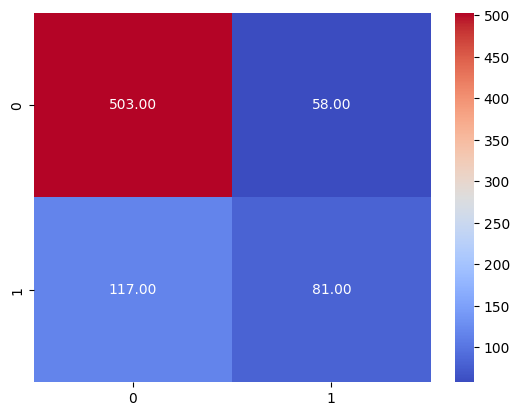

In [4977]:
forest_matrix = all_confusion_matrix['random_forest']
sns.heatmap(forest_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')

- Visualizing the ROC_AUC curve 

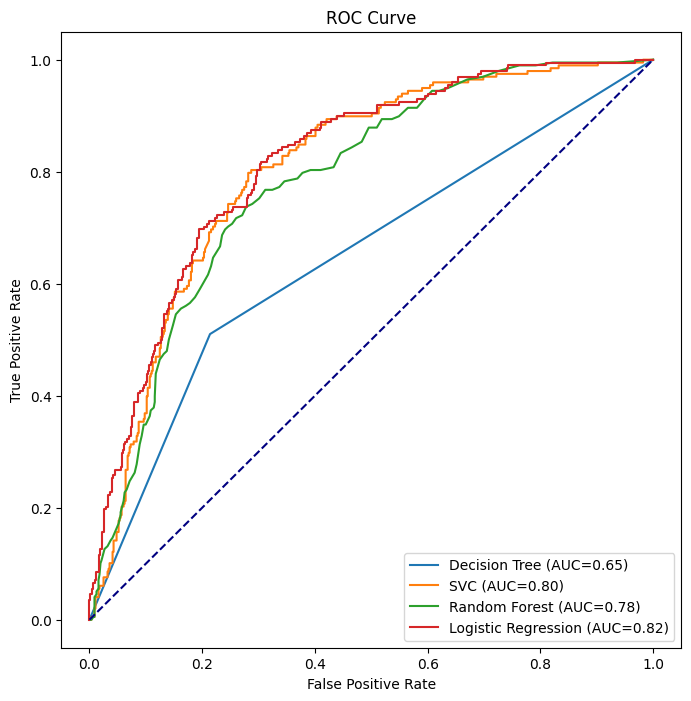

In [4978]:
roc_curve_data = {}

fig ,ax = plt.subplots(figsize=(8,8))

for model_name,pipeline in unbalanced_pipeline.items():
    
    y_score = pipeline.predict_proba(X_test)[:,1]
    
    fpr, tpr, threshold = roc_curve(y_test_encoded,y_score)
    roc_auc = auc(fpr,tpr)
    
    roc_curve_df= pd.DataFrame({
        'False Positive Rate':fpr,
        'True Positive Rate':tpr,
        'Thresholds':threshold,
    })
    roc_curve_data[model_name] = roc_curve_df
    
    ax.plot(fpr, tpr, label=f'{model_name} (AUC={roc_auc:.2f})')
    
ax.plot([0, 1],[0, 1],color = 'navy',linestyle = '--' )
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(loc='lower right')
plt.show()


In [4979]:
roc_curve_data['Random Forest'].tail(40)

False Positive Rate  True Positive Rate  Thresholds
54             0.245989            0.702020        0.39
55             0.253119            0.707071        0.38
56             0.260250            0.717172        0.37
57             0.270945            0.722222        0.36
58             0.278075            0.737374        0.35
59             0.288770            0.742424        0.34
60             0.301248            0.752525        0.33
61             0.311943            0.767677        0.32
62             0.324421            0.767677        0.31
63             0.336898            0.772727        0.30
64             0.345811            0.782828        0.29
65             0.368984            0.787879        0.28
66             0.377897            0.797980        0.27
67             0.392157            0.803030        0.26
68             0.409982            0.803030        0.25
69             0.433155            0.808081        0.24
70             0.445633            0.833333        0.23
71             0.465241            0.843434        0.22
72             0.483066            0.853535        0.21
73             0.495544            0.878788        0.20
74             0.509804            0.878788        0.19
75             0.518717            0.893939        0.18
76             0.536542            0.893939        0.17
77             0.549020            0.898990        0.16
78             0.565062            0.914141        0.15
79             0.581105            0.914141        0.14
80             0.593583            0.929293        0.13
81             0.607843            0.944444        0.12
82             0.620321            0.944444        0.11
83             0.636364            0.949495        0.10
84             0.670232            0.964646        0.09
85             0.698752            0.969697        0.08
86             0.725490            0.979798        0.07
87             0.762923            0.989899        0.06
88             0.791444            0.989899        0.05
89             0.821747            0.994949        0.04
90             0.844920            0.994949        0.03
91             0.894831            0.994949        0.02
92             0.935829            0.994949        0.01
93             1.000000            1.000000        0.00

In [4980]:
feature_columns = forest.named_steps['preprocessor'].get_feature_names_out()
feature_columns = np.array([col.split('__')[-1]for col in feature_columns])
feature_columns

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', ...,
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='<U39')

In [4981]:
importances = forest.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({
    'Feature':feature_columns,
    'Importance': importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

Feature  Importance
1                             tenure    0.067813
3                       TotalCharges    0.062404
2                     MonthlyCharges    0.057841
4096         Contract_Month-to-month    0.042650
4105  PaymentMethod_Electronic check    0.029825
...                              ...         ...
3197           customerID_7860-KSUGX    0.000000
1725           customerID_4335-BSMJS    0.000000
3219           customerID_7921-BEPCI    0.000000
3039           customerID_7492-TAFJD    0.000000
1851           customerID_4641-FROLU    0.000000

[4107 rows x 2 columns]

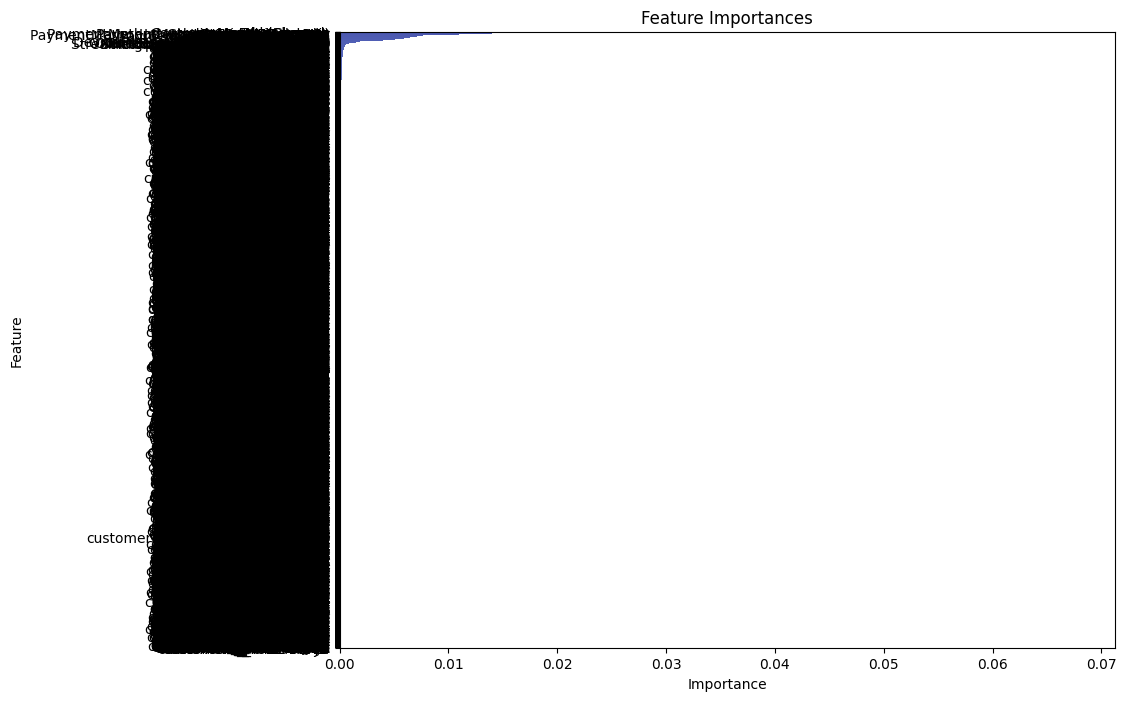

In [4982]:
plt.figure(figsize=(10, 8))

sns.barplot(x='Importance',y='Feature',data=importance_df,palette='coolwarm',hue='Feature',legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

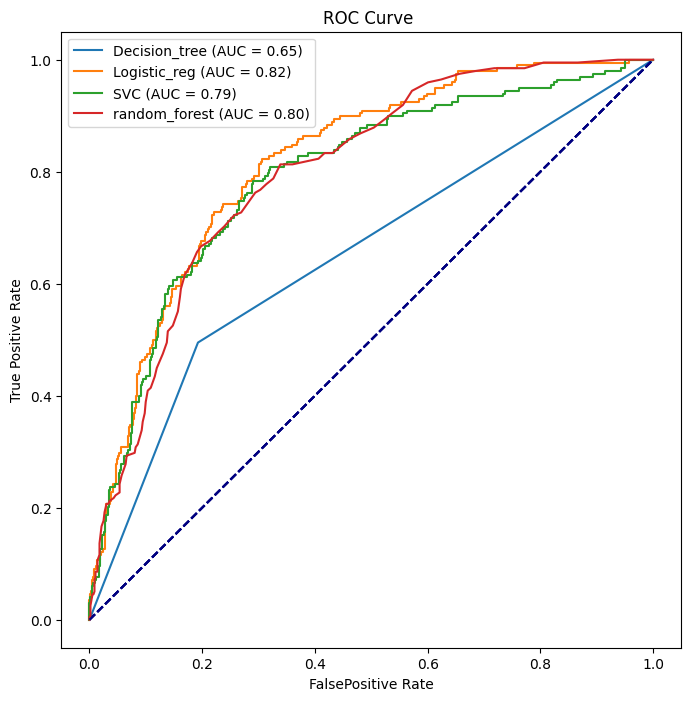

In [4983]:
fig, ax = plt.subplots(figsize = (8,8))

# add confusion matrix to all pipelines
all_confusion_matrix = {}

all_roc_data = {}

for model_name, pipeline in all_pipelines.items():
    y_score = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score)

    roc_auc = auc(fpr, tpr)

    roc_data_df = pd.DataFrame({'False Positive rate': fpr, 'True Positive Rate': tpr, 'Thresholds': thresholds})

    all_roc_data[model_name] = roc_data_df

    ax.plot(fpr, tpr, label= f'{model_name} (AUC = {roc_auc:.2f})')


    ax.plot([0,1], [0,1], color ='navy', linestyle ='--',)
    ax.set_xlabel('FalsePositive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve ') 
    ax.legend(loc = 'lower right')

plt.legend() 
plt.show()  

In [4984]:
roc_curve_data['Random Forest'].tail(40)

False Positive Rate  True Positive Rate  Thresholds
54             0.245989            0.702020        0.39
55             0.253119            0.707071        0.38
56             0.260250            0.717172        0.37
57             0.270945            0.722222        0.36
58             0.278075            0.737374        0.35
59             0.288770            0.742424        0.34
60             0.301248            0.752525        0.33
61             0.311943            0.767677        0.32
62             0.324421            0.767677        0.31
63             0.336898            0.772727        0.30
64             0.345811            0.782828        0.29
65             0.368984            0.787879        0.28
66             0.377897            0.797980        0.27
67             0.392157            0.803030        0.26
68             0.409982            0.803030        0.25
69             0.433155            0.808081        0.24
70             0.445633            0.833333        0.23
71             0.465241            0.843434        0.22
72             0.483066            0.853535        0.21
73             0.495544            0.878788        0.20
74             0.509804            0.878788        0.19
75             0.518717            0.893939        0.18
76             0.536542            0.893939        0.17
77             0.549020            0.898990        0.16
78             0.565062            0.914141        0.15
79             0.581105            0.914141        0.14
80             0.593583            0.929293        0.13
81             0.607843            0.944444        0.12
82             0.620321            0.944444        0.11
83             0.636364            0.949495        0.10
84             0.670232            0.964646        0.09
85             0.698752            0.969697        0.08
86             0.725490            0.979798        0.07
87             0.762923            0.989899        0.06
88             0.791444            0.989899        0.05
89             0.821747            0.994949        0.04
90             0.844920            0.994949        0.03
91             0.894831            0.994949        0.02
92             0.935829            0.994949        0.01
93             1.000000            1.000000        0.00

In [4985]:
log_pipeline = all_pipelines['Logistic_reg']

all_roc_data['Logistic_reg'].tail(50)

False Positive rate  True Positive Rate  Thresholds
174             0.408200            0.868687    0.186811
175             0.409982            0.868687    0.186234
176             0.409982            0.873737    0.186086
177             0.415330            0.873737    0.182662
178             0.415330            0.878788    0.182493
179             0.420677            0.878788    0.178618
180             0.420677            0.883838    0.177179
181             0.429590            0.883838    0.172252
182             0.429590            0.888889    0.172021
183             0.433155            0.888889    0.169049
184             0.433155            0.893939    0.168186
185             0.443850            0.893939    0.163458
186             0.443850            0.898990    0.163098
187             0.479501            0.898990    0.145693
188             0.479501            0.904040    0.145611
189             0.483066            0.904040    0.143917
190             0.483066            0.909091    0.143185
191             0.531194            0.909091    0.122567
192             0.531194            0.914141    0.121992
193             0.532977            0.914141    0.121685
194             0.532977            0.919192    0.121651
195             0.552585            0.919192    0.112235
196             0.552585            0.924242    0.112010
197             0.584670            0.924242    0.098575
198             0.584670            0.929293    0.098501
199             0.593583            0.929293    0.093841
200             0.593583            0.934343    0.093692
201             0.598930            0.934343    0.092428
202             0.598930            0.939394    0.091759
203             0.613191            0.939394    0.086933
204             0.613191            0.949495    0.084207
205             0.629234            0.949495    0.080521
206             0.629234            0.954545    0.080088
207             0.643494            0.954545    0.076350
208             0.643494            0.959596    0.076123
209             0.648841            0.959596    0.074379
210             0.648841            0.964646    0.073337
211             0.650624            0.964646    0.073332
212             0.650624            0.974747    0.072760
213             0.654189            0.974747    0.072324
214             0.654189            0.979798    0.072285
215             0.723708            0.979798    0.054593
216             0.723708            0.984848    0.054278
217             0.759358            0.984848    0.046638
218             0.759358            0.989899    0.046464
219             0.787879            0.989899    0.038967
220             0.787879            0.994949    0.038514
221             0.957219            0.994949    0.014544
222             0.957219            1.000000    0.014180
223             1.000000            1.000000    0.008230

- Training Models on a Balanced Data Set

In [4986]:
balanced_data_models =[
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_reg', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('random_forest', RandomForestClassifier(random_state = 42)),
    ('Gradient_Boosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42))
]

# Creating dictionary for the models
balanced_data_all_pipelines = {}

# Create an empty DataFrame for metrics
balanced_data_metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Loop over models and create pipelines, fit models, and calculate metrics
for model_name, classifier in models:
    balanced_data_final_pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote_sampler', SMOTE(random_state =42)),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on training data
    balanced_data_final_pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the evaluation dataset
    y_pred = balanced_data_final_pipeline.predict(X_test)
    
    # Calculate classification report metrics
    balanced_data_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Add all pipelines into balanced_data_all_pipelines
    balanced_data_all_pipelines[model_name] = balanced_data_final_pipeline
    
    # Extract metrics for the current model
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Add metrics to metrics_table
    balanced_data_metrics_table.loc[len(balanced_data_metrics_table)] = [model_name, accuracy, precision, recall, f1_score]

# Display the metrics table
balanced_data_metrics_table.sort_values(ascending=False, by='f1_score')

c:\Users\pc\Desktop\LP2\Customer-Churn-Prediction\virtual\lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


model_name  accuracy  precision    recall  f1_score
0  Decision_tree  0.769433   0.751667  0.769433   0.75501
1   Logistic_reg  0.769433   0.751667  0.769433   0.75501
2            SVC  0.769433   0.751667  0.769433   0.75501
3  random_forest  0.769433   0.751667  0.769433   0.75501

### `Hyperparameter Tuning`

In [4987]:
# Define the hyperparameters to search

param_grids = {

    'Decision_tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },

    'Logistic_reg': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],        
        'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'classifier__max_iter': [300]
    },

    'SVC': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'classifier__gamma': ['scale', 'auto']
    },

    'random_forest': {
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30]
    } 

    }


params = {}
search_histories = {}

for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(
        estimator = final_pipeline, 
        param_grid = param_grid, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
        scoring = ['f1_weighted', 'precision', 'recall'],
        refit = 'f1_weighted',
        verbose = 3, 
        n_jobs = -1
    )
    grid_search.fit(X_train, y_train_encoded)
    params[model_name] = grid_search
        
    search_history = pd.DataFrame(grid_search.cv_results_)        
    search_histories[model_name] = search_history

for model_name, grid_search in params.items():
    print(f'Best hyperparamters for {model_name}:{grid_search.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparamters for Decision_tree:{'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best hyperparamters for Logistic_reg:{'classifier__C': 1, 'classifier__max_iter': 300, 'classifier__solver': 'lbfgs'}
Best hyperparamters for SVC:{'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best hyperparamters for random_forest:{'classifier__max_depth': 10, 'classifier__n_estimators': 100}


#### Getting Models with the best hyperparamters

In [4988]:
def get_best_models(params):
    best_models = []
    for model_name, grid_search in params.items():
        best_model = grid_search.best_estimator_
        best_models.append((model_name, best_model))    
    
    return best_models
 
best_models = get_best_models(params)

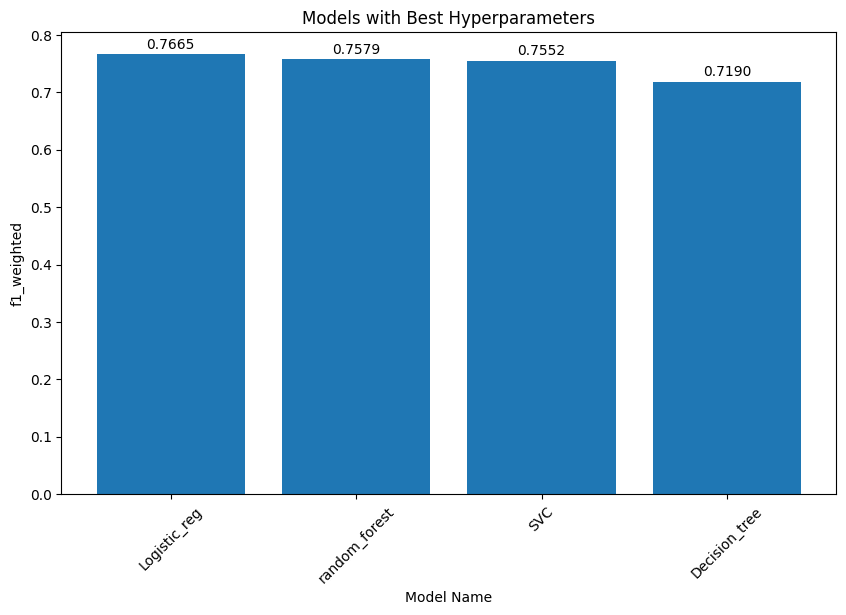

In [4989]:
# Get models f1_weighted scores and names
model_names = [model_name for model_name in search_histories.keys()]
model_scores = [search_history['mean_test_f1_weighted'].max() for search_history in search_histories.values()]

# Create a DataFrame to for plot
df_models = pd.DataFrame({'model_name': model_names, 'f1_score': model_scores})
df_models = df_models.sort_values(by='f1_score', ascending=False)


# Create a bar chart
plt.figure(figsize=(10,6))
plt.bar(data=df_models, x='model_name', height='f1_score')

# Add text labels to the bars
for i, score in enumerate(df_models['f1_score']):
    plt.text(i, score+0.01, '{:1.4f}'.format(score), ha="center")

plt.xlabel('Model Name')
plt.ylabel('f1_weighted')
plt.title('Models with Best Hyperparameters')
plt.xticks(rotation=45)
plt.show()

In [4990]:
metric_before_after_tuning_models = pd.merge(
    metrics_table[['model_name', 'f1_score']], 
    df_models, 
    on='model_name', 
    how='inner', 
    suffixes=('_before', '_after')
).sort_values(ascending=False, by='f1_score_after')

metric_before_after_tuning_models

model_name  f1_score_before  f1_score_after
1   Logistic_reg         0.778514        0.766533
3  random_forest         0.755010        0.757891
2            SVC         0.758978        0.755159
0  Decision_tree         0.727685        0.718956

##### Comparing models before and after hyperparameter tuning by using f1 score (weighted) metric.

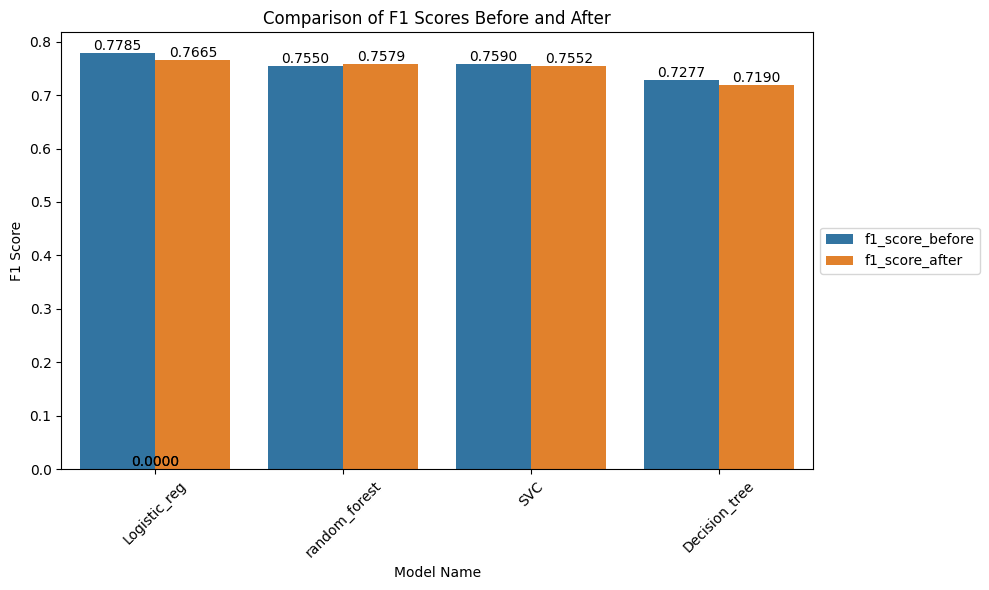

In [4991]:
# Melt the DataFrame to combine f1_score_before and f1_score_after into a single column
metric_melted = metric_before_after_tuning_models.melt(id_vars='model_name', var_name='score_type', value_name='f1_score')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the combined data
ax = sns.barplot(data=metric_melted, x='model_name', y='f1_score', hue='score_type')
plt.title('Comparison of F1 Scores Before and After')
plt.xlabel('Model Name')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)

# Annotate the values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
    
# Move legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

-  Feature importances visualizations

In [4992]:
best_model_name = df_models['model_name'].iloc[0]
best_model = dict(best_models).get(best_model_name)
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power-transformation',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=300, random_state=42))])

- Feature Importances visualizations
